# Initial EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
np.random.seed(666)


In [4]:
pd.options.display.max_rows = 80
pd.options.display.max_columns = 80

In [5]:
# Define the file path
file_path = r"C:\Users\17366\OneDrive - Queen's University\Queen's\Cisc 351\Group Project\listings.csv"

# Read the CSV file
nyc = pd.read_csv(file_path)

In [6]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39202 entries, 0 to 39201
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            39202 non-null  int64  
 1   listing_url                                   39202 non-null  object 
 2   scrape_id                                     39202 non-null  int64  
 3   last_scraped                                  39202 non-null  object 
 4   source                                        39202 non-null  object 
 5   name                                          39202 non-null  object 
 6   description                                   38121 non-null  object 
 7   neighborhood_overview                         22529 non-null  object 
 8   picture_url                                   39202 non-null  object 
 9   host_id                                       39202 non-null 

In [7]:
nyc.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,977395984065981849,https://www.airbnb.com/rooms/977395984065981849,20240206005441,2024-02-06,city scrape,Home in Brooklyn · 1 bedroom · 1 bed · 1 bath,This unique place has a style all its own. Is ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,95344065,https://www.airbnb.com/users/show/95344065,Derek,2016-09-15,"New York, NY",Like to be active and try to live a healthy li...,a few days or more,0%,54%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Sheepshead Bay,8.0,13.0,"['email', 'phone']",t,t,NaN,Sheepshead Bay,Brooklyn,40.591790,-73.942850,Private room in home,Private room,1,1.0,1 bath,1.0,1.0,"[""Lock on bedroom door"", ""Hot tub"", ""Carbon mo...",$30.00,31,365,31.0,31.0,365.0,365.0,31.0,365.0,NaN,t,4,34,64,339,2024-02-06,1,1,0,2024-01-03,2024-01-03,2.00,2.00,1.00,4.00,4.00,4.00,3.00,NaN,f,7,1,6,0,0.86
1,648033676238017128,https://www.airbnb.com/rooms/648033676238017128,20240206005441,2024-02-06,city scrape,Rental unit in Bronx · ★4.89 · 1 bedroom · 1 b...,Welcome to this beautiful cozy bedroom in a sp...,NaN,https://a0.muscache.com/pictures/85291dc6-1e55...,421601513,https://www.airbnb.com/users/show/421601513,J Carlos Retals,2021-09-04,United States,Mi nombre es Juan Carlos nacido en República D...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/7658c...,https://a0.muscache.com/im/pictures/user/7658c...,West Bronx,6.0,6.0,"['email', 'phone']",t,t,NaN,Kingsbridge,Bronx,40.863940,-73.903120,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""TV"", ""Microwave"", ""Bathtub"", ""Carbon monoxid...",$30.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,25,55,85,359,2024-02-06,18,6,0,2022-07-17,2023-12-26,4.89,5.00,4.72,4.94,4.83,4.94,4.94,NaN,f,3,0,3,0,0.95
2,871990853610302281,https://www.airbnb.com/rooms/871990853610302281,20240206005441,2024-02-06,city scrape,Rental unit in Queens · ★New · 1 bedroom · Hal...,"Kick back and relax in this calm, open space.",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,484563208,https://www.airbnb.com/users/show/484563208,Tricia,2022-10-21,"New York, NY","Am a people person, love socializing and trave...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/1f3bd...,https://a0.muscache.com/im/pictures/user/1f3bd...,Jamaica,2.0,4.0,"['email', 'phone']",t,t,NaN,Howard Beach,Queens,40.663586,-73.834532,Private room in rental unit,Private room,1,0.5,Half-bath,1.0,0.0,"[""TV"", ""Lock on bedroom door"", ""Carbon monoxid...",$85.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,30,60,89,89,2024-02-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
3,15943497,

## Preprocessing

First of all, we noticed that **host_since**, a figure indicating the date when the host first joined Airbnb, might have a significant predictive power as it illustrates hosts' experience, which is a crucial factor on Airbnb's website. Thus, we reformat it into **yrs_exp**, measuring each host's experience in years.

In [8]:
from datetime import datetime

nyc['host_since'] = pd.to_datetime(nyc['host_since'])

# Calculate time difference in years
current_date = datetime.now()
nyc['yrs_exp'] = (current_date - nyc['host_since']).dt.days / 365
nyc['yrs_exp'] = nyc['yrs_exp'].astype(float).round(1)


Also, the target variable, **price**, need to be reformatted.

In [9]:
nyc['price1'] = nyc['price'].str.replace('$','')
nyc['price1'] = nyc['price1'].str.replace(',','')
nyc['price1'] = nyc['price1'].astype(float)

### Remove redundant columns

In [10]:
columns_remove = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_id', 'host_name', 'host_location', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'neighbourhood', 'bathrooms_text', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'calendar_last_scraped']
nyc = nyc.drop(columns=columns_remove)

In [11]:
nyc.dtypes

id                                                       int64
name                                                    object
description                                             object
neighborhood_overview                                   object
host_since                                      datetime64[ns]
host_about                                              object
host_response_time                                      object
host_response_rate                                      object
host_acceptance_rate                                    object
host_is_superhost                                       object
host_listings_count                                    float64
host_total_listings_count                              float64
host_verifications                                      object
host_has_profile_pic                                    object
host_identity_verified                                  object
neighbourhood_cleansed                                 

### Missing Values

In [12]:
nyc.isnull().sum()

id                                                  0
name                                                0
description                                      1081
neighborhood_overview                           16673
host_since                                          5
host_about                                      17444
host_response_time                              17873
host_response_rate                              17873
host_acceptance_rate                            12675
host_is_superhost                                 188
host_listings_count                                 5
host_total_listings_count                           5
host_verifications                                  0
host_has_profile_pic                                5
host_identity_verified                              5
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

We have to remove rows where **price** is missing, as it is our target variable.

In [13]:
nyc = nyc.dropna(subset=['price']).reset_index(drop=True)


In [14]:
nyc.isnull().sum()

id                                                  0
name                                                0
description                                       441
neighborhood_overview                            9952
host_since                                          0
host_about                                      10075
host_response_time                               5646
host_response_rate                               5646
host_acceptance_rate                             1867
host_is_superhost                                 152
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

As observed below, some of the missing values are highly correlated. We will address them starting with the most correlated ones.

<Axes: >

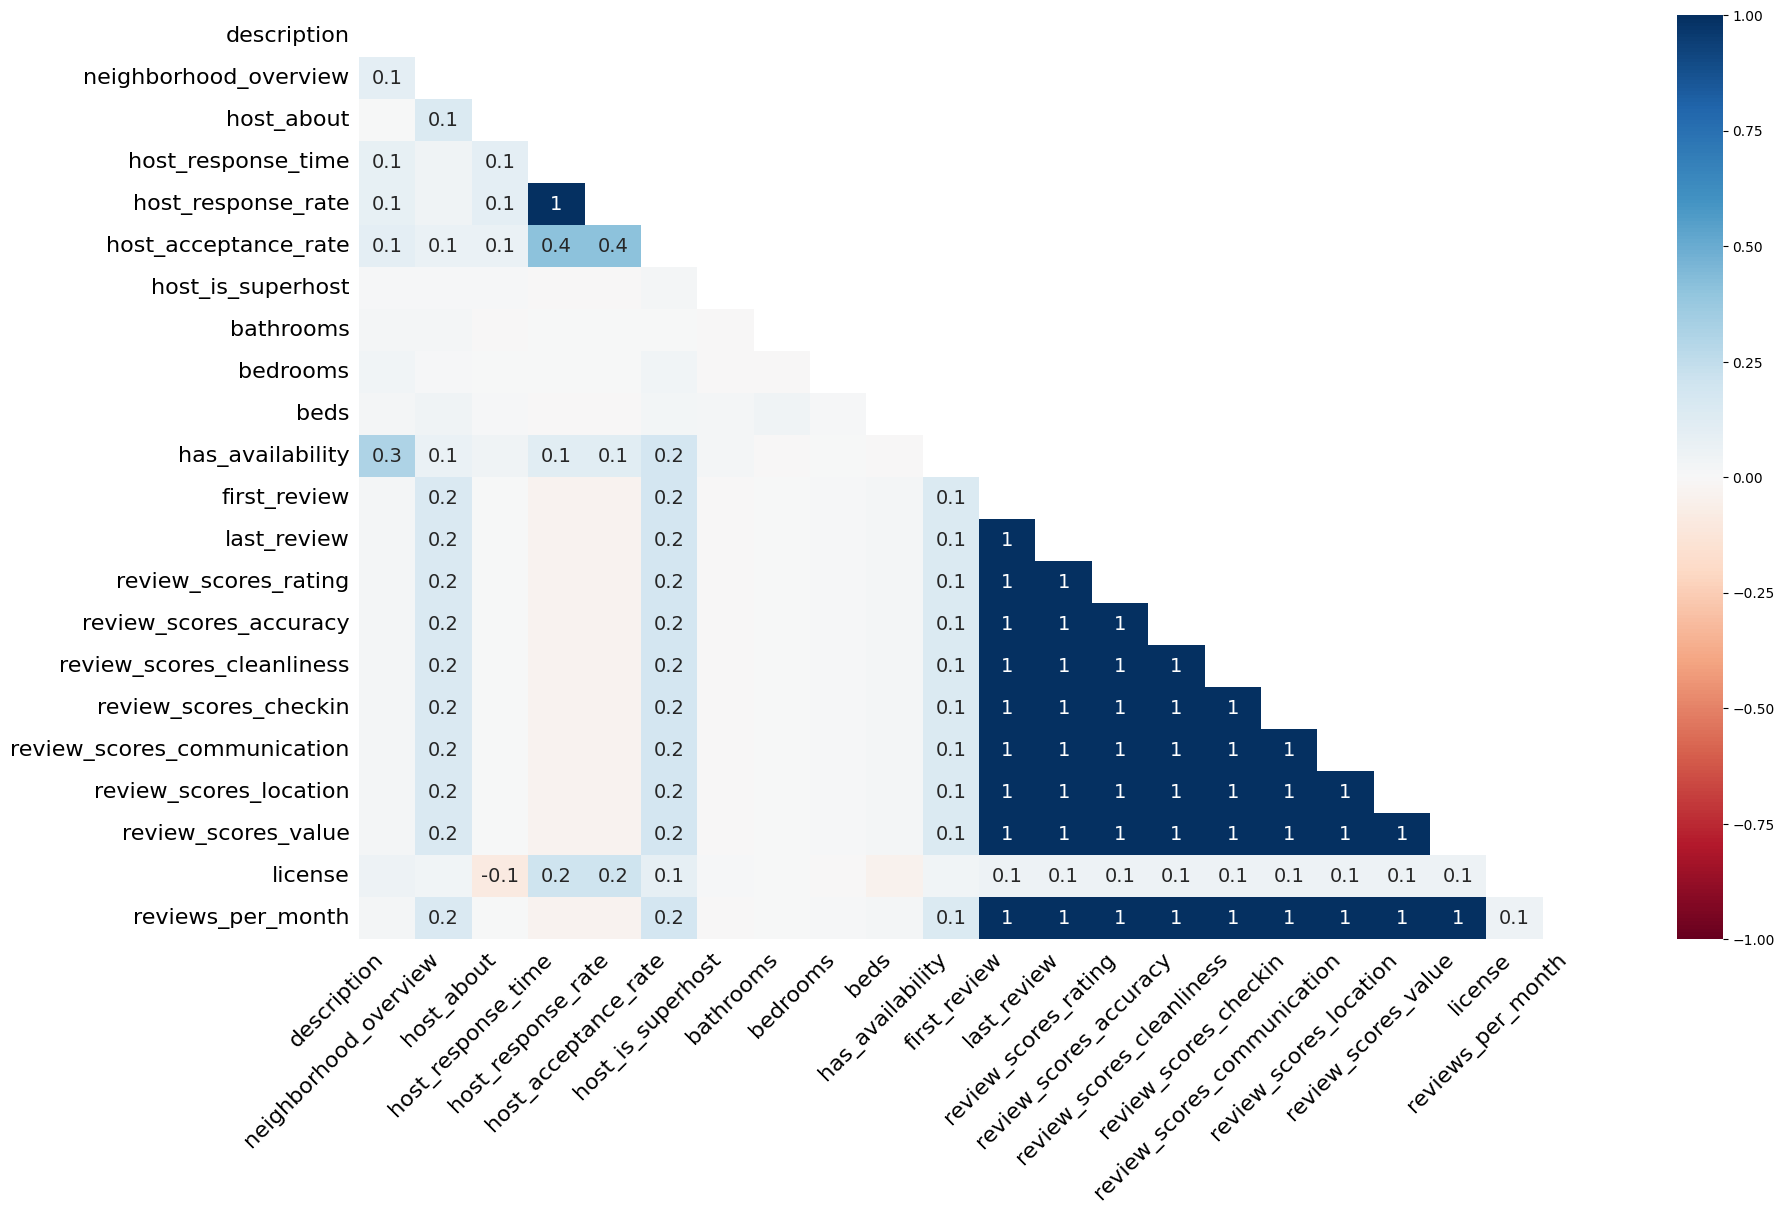

In [15]:
msno.heatmap(nyc)


1. **host_response_rate** & **host_response_time**

In [16]:
nyc['host_response_time'].unique()

array(['a few days or more', 'within an hour', 'within a day', nan,
       'within a few hours'], dtype=object)

We analyze **host_response_time** against **yrs_exp**, which is an indicator of hosts' expericences and profesionality; also, we analyze **host_response_time** against **calculated_host_listings_count**, which also suggests if the host is a professional or not. As the ANOVA tests show, **host_response_time** is not significantly different across different levels of **yrs_exp** and **calculated_host_listings_count**. Therefore, we opt to manually check hosts' information on Airbnb's website, and discover that **host_response_time** and **host_response_rate** information are not standardized, which explains the reason why they are missing since the dataset is created by scraper. Thus, missing values in the two columns are viewed as MCAR, and we fill them with 'unknown', which corresponds to the information displayed on Airbnb website.

In [17]:
# Replace NAs with a specific value (e.g., 'Unknown')
nyc['host_response_time'] = nyc['host_response_time'].fillna('Unknown')

from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(*[nyc[nyc['host_response_time'] == category]['yrs_exp'] for category in nyc['host_response_time'].unique()])

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)


ANOVA F-statistic: 41.68174034582701
ANOVA p-value: 6.962189596103152e-35


In [18]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(*[nyc[nyc['host_response_time'] == category]['calculated_host_listings_count'] for category in nyc['host_response_time'].unique()])

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 433.34664847768914
ANOVA p-value: 0.0


***host_response_rate*** is a percentage. Therefore, based on the its distribution, we discretize it into 11 bins: 'unknown', '0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%'

In [19]:
nyc['host_response_rate'] = nyc['host_response_rate'].str.replace('%', '').astype(float)

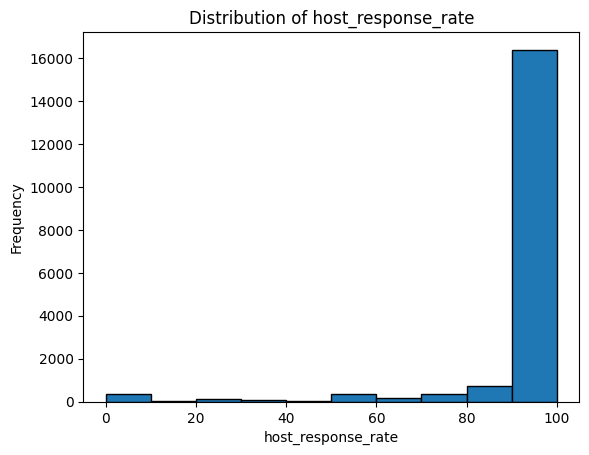

In [20]:
plt.hist(nyc['host_response_rate'], bins=10, edgecolor='black')
plt.title('Distribution of host_response_rate')
plt.xlabel('host_response_rate')
plt.ylabel('Frequency')
plt.show()


In [21]:
bin_setting = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
bins = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%'] 
nyc['host_response_rate_bins'] = pd.cut(nyc['host_response_rate'], bins=bin_setting, labels=bins, include_lowest=True)

In [22]:
nyc['host_response_rate_bins'] = nyc['host_response_rate_bins'].cat.add_categories(['Unknown']).fillna('Unknown').cat.reorder_categories(['Unknown', '0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']) 
nyc['host_response_rate_bins'].value_counts()

91-100%    16021
Unknown     5646
81-90%       892
71-80%       453
0-10%        358
61-70%       240
41-50%       220
51-60%       181
21-30%       160
31-40%        66
11-20%        30
Name: host_response_rate_bins, dtype: int64

***host_acceptance_rate*** is similar to ***host_response_rate***, so we discretize it into 11 bins: 'unknown', '0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%'

In [23]:
nyc['host_acceptance_rate'] = nyc['host_acceptance_rate'].str.replace('%', '').astype(float)

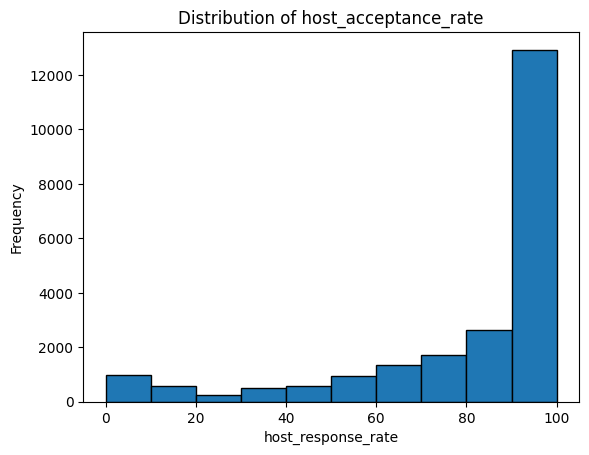

In [24]:
plt.hist(nyc['host_acceptance_rate'], bins=10, edgecolor='black')
plt.title('Distribution of host_acceptance_rate')
plt.xlabel('host_response_rate')
plt.ylabel('Frequency')
plt.show()

In [25]:
bin_setting = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
bins = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%'] 
nyc['host_acceptance_rate_bins'] = pd.cut(nyc['host_acceptance_rate'], bins=bin_setting, labels=bins, include_lowest=True)

In [26]:
nyc['host_acceptance_rate_bins'] = nyc['host_acceptance_rate_bins'].cat.add_categories(['Unknown']).fillna('Unknown').cat.reorder_categories(['Unknown', '0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%']) 
nyc['host_acceptance_rate_bins'].value_counts()

91-100%    12512
81-90%      2754
Unknown     1867
71-80%      1861
61-70%      1267
0-10%        990
41-50%       823
51-60%       773
11-20%       622
31-40%       593
21-30%       205
Name: host_acceptance_rate_bins, dtype: int64

2. Missing values in ***host_is_superhost*** is deemed as *False*

In [27]:
nyc['host_is_superhost'] = nyc['host_is_superhost'].fillna('f')

3. Based on our exploration, ***has_availability*** is likely to be an irrelevant feature, as it does not correspond to the actual availability of the listing. Therefore, we remove this column.

In [28]:
nyc[nyc['has_availability'] == 'f'].head()

,id,name,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,yrs_exp,price1,host_response_rate_bins,host_acceptance_rate_bins
173,1010122514884550235,Rental unit in Brooklyn · ★New · 1 bedroom · 1...,We are an animal loving family. We board dogs ...,NaN,2020-06-07,NaN,Unknown,NaN,NaN,f,1.0,1.0,"['email', 'phone']",t,t,Cypress Hills,Brooklyn,40.678950,-73.888100,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""TV"", ""Lock on bedroom door"", ""Carbon monoxid...",$80.00,30,365,f,29,59,89,269,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,3.9,80.0,Unknown,Unknown
1227,776267527494946591,Rental unit in Brooklyn · 1 bedroom · 2 beds ·...,NaN,NaN,2012-02-25,NaN,Unknown,NaN,NaN,f,1.0,1.0,['phone'],t,f,Flatbush,Brooklyn,40.641740,-73.959010,Entire rental unit,Entire home/apt,4,1.0,1.0,2.0,"[""Wifi"", ""First aid kit"", ""Dedicated workspace...",$175.00,30,365,f,28,58,88,363,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,12.2,175.0,Unknown,Unknown
1406,897190757952784023,Rental unit in Brooklyn · 2 bedrooms · 2 beds ...,Over 2000 sq of loft magic awaits you in one o...,Clinton Hill is a quintessential Brooklyn neig...,2017-02-13,Hi Im Tess! From GA I've found myself in Broo...,Unknown,NaN,100.0,f,2.0,2.0,"['email', 'phone']",t,t,Bedford-Stuyvesant,Brooklyn,40.689810,-73.959580,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,"[""Piano"", ""Stainless steel double oven"", ""Extr...",$288.00,30,1125,f,30,60,89,89,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN,7.2,288.0,Unknown,91-100%
1417,926987680896723420,Rental unit in New York · 1 bedroom · 1 bed · ...,NaN,NaN,2018-12-26,Hi there!! Welcome to NYC! the City that never...,Unknown,NaN,0.0,f,2.0,2.0,"['email', 'phone']",f,t,East Harlem,Manhattan,40.795195,-73.948506,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Carbon monoxide alarm"", ""Smoke alarm"", ""Firs...",$63.00,30,365,f,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN,5.3,63.0,Unknown,0-10%
1550,1026093383801867727,Rental unit in Queens · 1 bedroom · 1 bed · 1 ...,NaN,NaN,2023-11-16,NaN,Unknown,NaN,NaN,f,1.0,1.0,"['email', 'phone']",t,t,Elmhurst,Queens,40.727600,-73.876650,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""TV"", ""Wifi"", ""Smoke alarm"", ""Dedicated works...",$100.00,30,45,f,0,0,0,154,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN,0.4,100.0,Unknown,Unknown


In [29]:
nyc = nyc.drop('has_availability', axis=1)

4. Attributes Related to Reviews

The missing values in **first_review**, **last_review**, **reviews_per_month** are correlated, as they indicate if a listing has a review or not. And **review_scores_rating**, **review_scores_accuracy**, **review_scores_cleanliness**, **review_scores_checkin**, **review_scores_communication**, **review_scores_location**, **review_scores_value** are optional for tenants to fill when completing the reviews, which explains the high correlation. Therefore, missing values in these attributes are viewed as MNAR -- NA simply indicates that the listing has no reviews. 

In [30]:
nyc.isnull().sum()

id                                                  0
name                                                0
description                                       441
neighborhood_overview                            9952
host_since                                          0
host_about                                      10075
host_response_time                                  0
host_response_rate                               5646
host_acceptance_rate                             1867
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

- Create ***review?*** which is a binary variable indicating if a listing has a review or not.

In [31]:
nyc['review?'] = nyc['first_review'].notnull().apply(lambda x: 1 if x else 0)
nyc['review?'] = nyc['review?'].astype('category')

- Fill NAs in **reviews_per_month** with 0 as it indicates that the listing has no recent reviews.

In [32]:
nyc['reviews_per_month_filled'] = nyc['reviews_per_month'].fillna(0)

- Fill NAs in **review_scores_rating**, **review_scores_accuracy**, **review_scores_cleanliness**, **review_scores_checkin**, **review_scores_communication**, **review_scores_location**, **review_scores_value**
> All these attributes are significantly left-skewed and has a heavy-tail. Which suggests that we should consider using tree-based models that could handle these distributions better. We decide not to discretize or transform them to prevent the loss of information. Based on the assumption that when tenants see a listing with no review scores, they will view the listing as mediocre, we decide to fill NAs with the median of each attribute, instead of using predictive imputation methods or leaving them as NAs for tree-based boosting models, which though might yield better performance, are not consistent with the assumption (the assumption is based on customer perceived value theory by Holbrook, M. B. (1999)., which is not a data-driven assumption.)



In [33]:
nyc.describe().append(nyc.kurtosis().rename('kurtosis')).append(nyc.skew().rename('skewness'))

,id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,yrs_exp,price1,reviews_per_month_filled
count,2.426700e+04,18621.000000,22400.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24262.000000,24220.000000,24149.000000,24267.000000,2.426700e+04,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,24267.000000,17573.000000,17573.000000,17573.000000,17572.000000,17573.000000,17572.000000,17573.000000,24267.000000,24267.000000,24267.000000,24267.000000,17561.000000,24267.000000,24267.000000,24267.000000
mean,4.492633e+17,94.010365,80.826384,234.796761,353.827461,40.728540,-73.942532,2.983888,1.202807,1.375351,1.681809,27.729138,1.333108e+03,17.402440,37.805662,58.978613,227.303952,33.040302,8.374129,0.249392,4.714954,4.746357,4.674575,4.820181,4.805577,4.718675,4.614357,61.771912,36.876458,23.989080,0.056208,1.301062,6.631541,206.502946,0.941523
std,4.355667e+17,17.707737,26.976017,929.080171,1326.227741,0.058749,0.059672,2.140425,0.555458,0.967038,1.254329,22.403463,1.283847e+05,12.785156,23.829359,34.080326,120.950963,68.461426,20.102482,1.669225,0.452862,0.442029,0.481913,0.379185,0.425252,0.393774,0.495046,171.404224,148.688843,92.468303,0.393077,1.904935,3.632302,1004.705385,1.721766
min,2.595000e+03,0.000000,0.000000,1.000000,1.000000,40.500314,-74.251907,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.200000,10.000000,0.000000
25%,3.732767e+07,99.000000,73.000000,1.000000,2.000000,40.686546,-73.982560,2.000000,1.000000,1.000000,1.000000,30.000000,1.200000e+02,2.000000,13.000000,31.000000,115.000000,0.000000,0.000000,0.000000,4.640000,4.690000,4.580000,4.800000,4.800000,4.610000,4.510000,1.000000,0.000000,0.000000,0.000000,0.240000,3.300000,80.000000,0.000000
50%,5.973046e+17,100.000000,94.000000,3.000000,5.000000,40.728110,-73.952450,2.000000,1.000000,1.000000,1.000000,30.000000,3.650000e+02,23.000000,49.000000,73.000000,258.000000,6.000000,1.000000,0.000000,4.840000,4.880000,4.820000,4.930000,4.940000,4.810000,4.750000,2.000000,1.000000,0.000000,0.000000,0.720000,7.000000,129.000000,0.310000
75%,8.637016e+17,100.000000,100.000000,17.000000,26.000000,40.763440,-73.920640,4.000000,1.000000,2.000000,2.000000,30.000000,1.125000e+03,30.000000,60.000000,89.000000,349.000000,35.000000,10.000000,0.000000,5.000000,5.000000,4.980000,5.000000,5.000000,5.000000,4.890000,13.000000,3.000000,3.000000,0.000000,1.880000,9.400000,212.000000,1.330000
max,1.084860e+18,100.000000,100.000000,5110.000000,8879.000000,40.911147,-73.713650,16.000000,15.500000,16.000000,42.000000,999.000000,2.000000e+07,30.000000,60.000000,90.000000,365.000000,1887.000000,1163.000000,88.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,827.000000,827.000000,599.000000,6.000000,78.250000,15.700000,100000.000000,78.250000
kurtosis,-1.797629e+00,15.842434,1.925867,21.998784,20.185643,0.100865,2.692721,9.206636,38.232857,9.734882,59.052894,257.356648,2.426645e+04,-1.671918,-1.339559,-1.123956,-1.215487,69.563047,838.644048,1160.288634,27.544213,30.587116,20.806540,45.880318,38.063986,29.640262,19.381942,11.863770,23.139168,25.563756,103.078578,292.076900,-1.012392,8051.815996,326.427959
skewness,5.208089e-02,-3.937925,-1.685030,4.801656,4

> 1. **review_scores_rating**: 

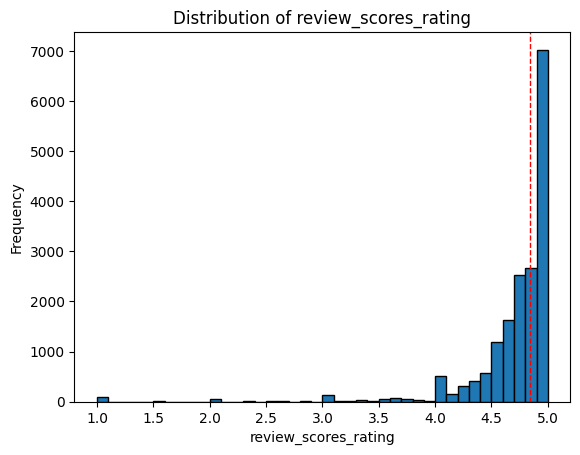

In [34]:
plt.hist(nyc['review_scores_rating'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_rating')
plt.xlabel('review_scores_rating')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_rating'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [35]:
nyc['review_scores_rating_filled'] = nyc['review_scores_rating'].fillna(nyc['review_scores_rating'].median())

> 2. **review_scores_accuracy**: discretize into 5 bins: unknown, 1-3, 3-4, 4-4.5, 4.5-5

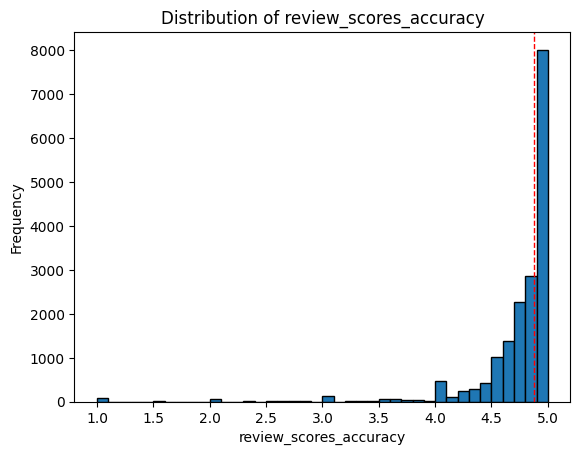

In [36]:
plt.hist(nyc['review_scores_accuracy'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_accuracy')
plt.xlabel('review_scores_accuracy')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_accuracy'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [37]:
nyc['review_scores_accuracy_filled'] = nyc['review_scores_accuracy'].fillna(nyc['review_scores_accuracy'].median())

> 3. **review_scores_cleanliness**

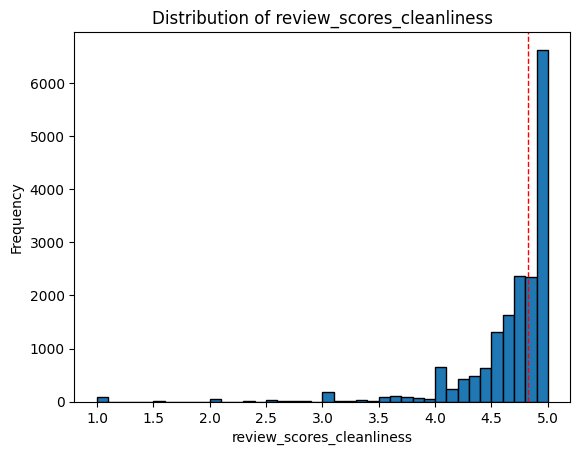

In [38]:
plt.hist(nyc['review_scores_cleanliness'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_cleanliness')
plt.xlabel('review_scores_cleanliness')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_cleanliness'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [39]:
nyc['review_scores_cleanliness_filled'] = nyc['review_scores_cleanliness'].fillna(nyc['review_scores_cleanliness'].median())

> 4. **review_scores_checkin**

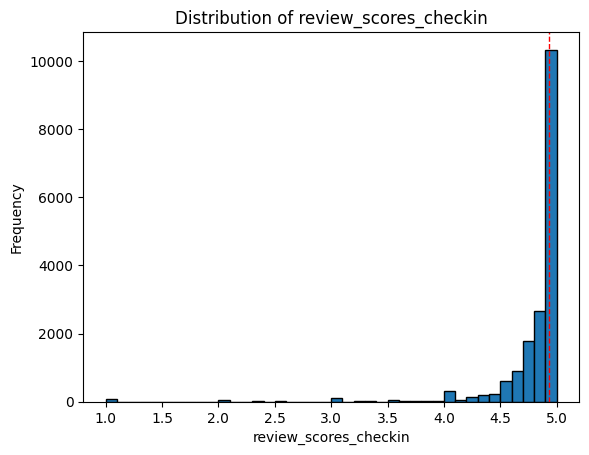

In [40]:
plt.hist(nyc['review_scores_checkin'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_checkin')
plt.xlabel('review_scores_checkin')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_checkin'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [41]:
nyc['review_scores_checkin_filled'] = nyc['review_scores_checkin'].fillna(nyc['review_scores_cleanliness'].median())

> 5. **review_scores_communication**

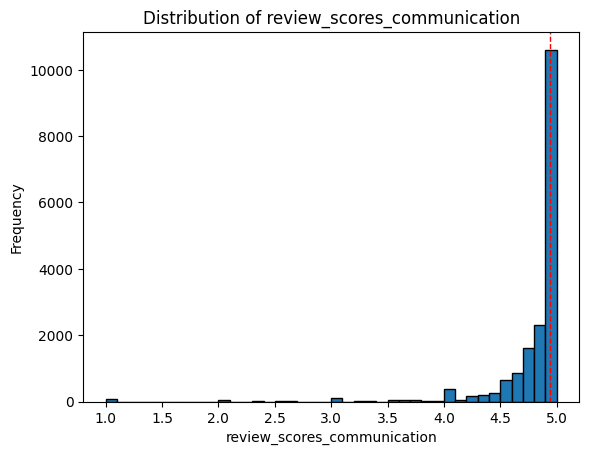

In [42]:
plt.hist(nyc['review_scores_communication'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_communication')
plt.xlabel('review_scores_communication')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_communication'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [43]:
nyc['review_scores_communication_filled'] = nyc['review_scores_communication'].fillna(nyc['review_scores_communication'].median())

> 6. **review_scores_location**

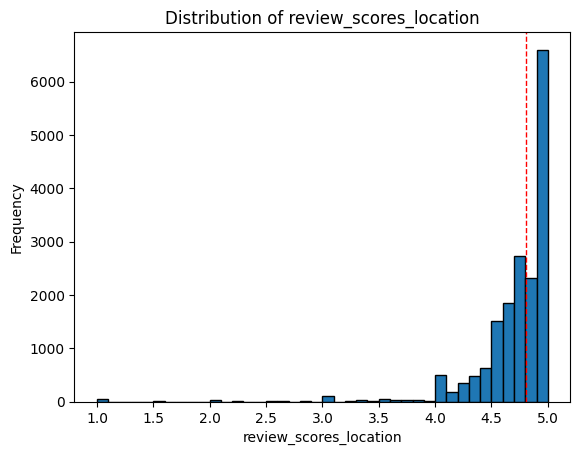

In [44]:
plt.hist(nyc['review_scores_location'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_location')
plt.xlabel('review_scores_location')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_location'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [45]:
nyc['review_scores_location_filled'] = nyc['review_scores_location'].fillna(nyc['review_scores_location'].median())

> 7. **review_scores_value**

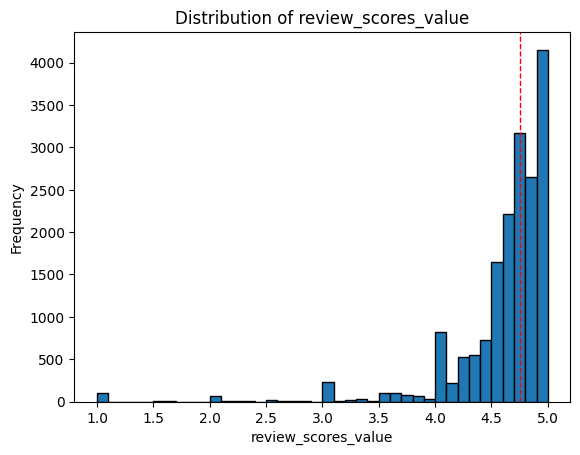

In [46]:
plt.hist(nyc['review_scores_value'], bins=40, edgecolor='black')
plt.title('Distribution of review_scores_value')
plt.xlabel('review_scores_value')
plt.ylabel('Frequency')
plt.axvline(nyc['review_scores_value'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [47]:
nyc['review_scores_value_filled'] = nyc['review_scores_value'].fillna(nyc['review_scores_value'].median())

>8. **license**

According to the datasource, missing values in **license** suggest that the host does not hold a license. Therefore, we fill the missing values with unlicensed.

In [48]:
nyc['license1'] = nyc['license'].fillna('unlicensed')

>9. **amenities**

Dummy variables are discarded for there are too many being created. Instead, NLP and other text-mining techniques will be adopted to process amenities.

In [49]:
# # Convert the amenities column from string to list
# nyc['amenities'] = nyc['amenities'].apply(lambda x: x.strip('[]').replace('"', '').split(', '))

# # Expand the amenities into dummy variables
# amenities_dummies = nyc['amenities'].str.join('|').str.get_dummies()

# # Concatenate the original DataFrame with the dummy DataFrame
# nyc = pd.concat([nyc, amenities_dummies], axis=1)

### Correlation

In [50]:
nyc_new = nyc.drop(columns=['host_since', 'host_response_rate', 'latitude', 'longitude', 'price', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license'])

#### Numerical

As observed below, except for columns that are naturally correlated, for example, **bedrooms** and **beds**, reviews-related attributes, and etc., there is no significant correlation between the independent variables. Therefore, we decide to keep all the independent variables for now.

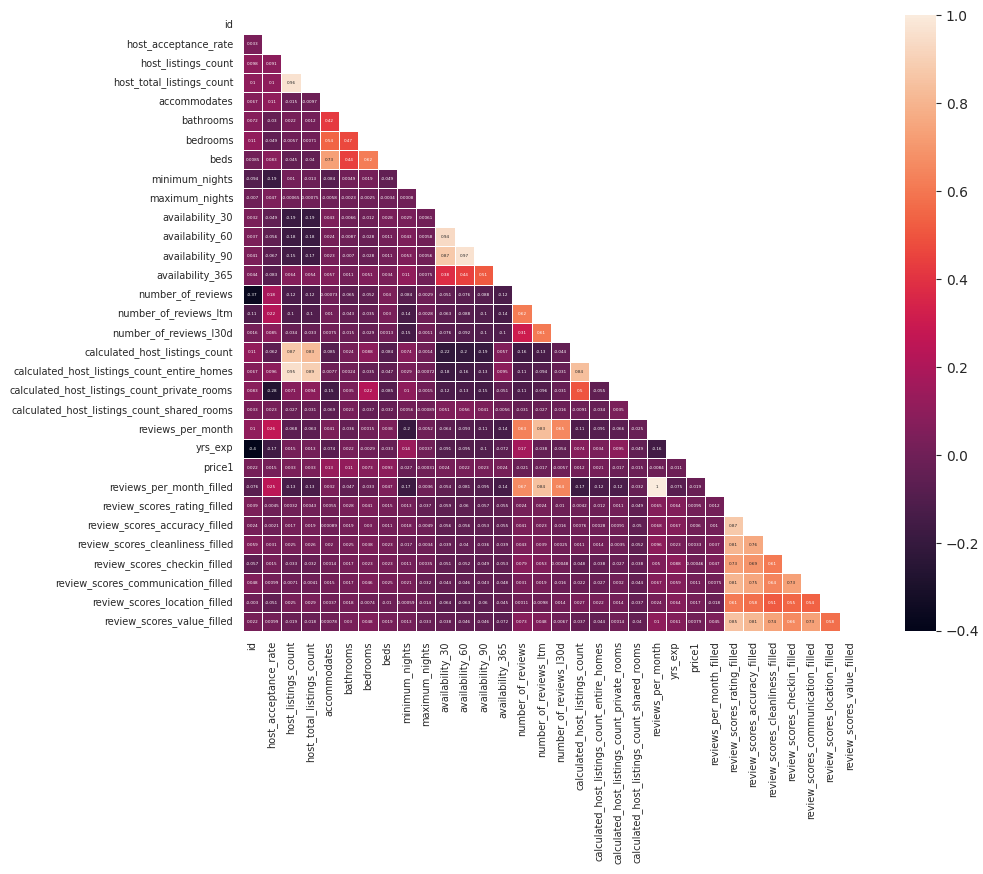

In [51]:
corr_num1 = nyc_new.corr(method='pearson')

plt.figure(figsize=(12,8))

mask = np.zeros_like(corr_num1)

mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(corr_num1, mask=mask, vmax=1, annot=True, linewidths=0.5, square=True, annot_kws={'size':3})
    
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)    
plt.show()

#### Neighborhood vs. Price

It is a common belief that the neighborhood has a significant impact on the price of a listing. However, as shown in the ANOVA tests, the neighborhood does not have a significant impact on the price. This could potentially be due to the fact that hosts might set the price based on the listing's attributes, rather than the neighborhood. For instance, in some expensive neighborhoods, there might be disturbingly cheap listings for basements, sofa bed in the living room, and etc. In other words, Airbnb pricing is much more delicate than property prices in the real estate market. Therefore, we decide to keep the neighborhood as a feature for now.

1. **neighbourhood_cleansed** (relatively smaller neighborhood) vs. **price**

In [52]:
f_statistic, p_value = f_oneway(*[nyc[nyc['neighbourhood_cleansed'] == category]['price1'] for category in nyc['neighbourhood_cleansed'].unique()])

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 1.3724812224848273
ANOVA p-value: 0.00021249633712586572


2. **neighbourhood_group_cleansed** (relatively larger neighborhood) vs. **price**

In [53]:
f_statistic, p_value = f_oneway(*[nyc[nyc['neighbourhood_group_cleansed'] == category]['price1'] for category in nyc['neighbourhood_group_cleansed'].unique()])

print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 20.774159911217186
ANOVA p-value: 4.112032144223057e-17


## Other Explorations 

### Price Distribution

The 'price1' data has a total count of 24,267 entries. The mean (average) price is approximately 206.50, but the data has a high standard deviation of 1004.70, indicating a large spread in the data. The minimum price is 10.00 and the maximum price is 100,000.00, showing a wide range in the prices. The 25th percentile (Q1) is 80.00, the median (50th percentile or Q2) is 129.00, and the 75th percentile (Q3) is 212.00. This means that 50% of the prices are between 80.00 and 212.00. The highest prices show a significant jump from 20,500.00 to 100,000.00, suggesting there may be some outliers or extreme values in the high end of the distribution. The lowest prices range from 10.00 to 22.00, with multiple listings at the minimum price of 10.00. Given the large standard deviation and the wide range between the minimum and maximum, the distribution of 'price1' is likely to be skewed, with a few high values pulling the mean upwards.

In [54]:
nyc['price1'] = nyc['price'].str.replace('$','')
nyc['price1'] = nyc['price1'].str.replace(',','')
nyc['price1'] = nyc['price1'].astype(float)


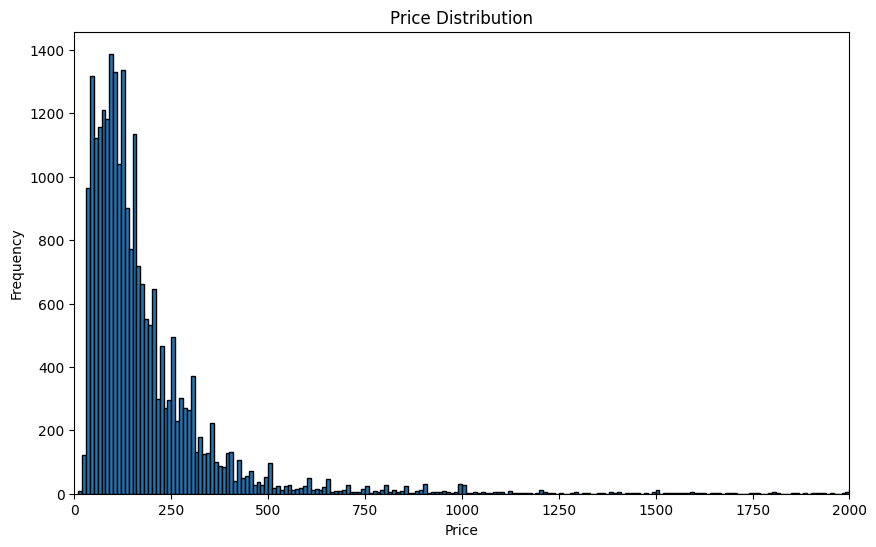

In [55]:
plt.figure(figsize=(10,6))
plt.hist(nyc['price1'], bins=10000, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 2000)
plt.show()

In [56]:
num_observations = nyc[nyc['price1'] > 1000].shape[0]
print(f"Number of observations where price1 > 1000: {num_observations/nyc.shape[0]:.2%}")

Number of observations where price1 > 1000: 1.29%


In [57]:
# print the distribution of the price1
print(nyc['price1'].describe())
# print the highest prices of price1
print(nyc['price1'].nlargest(20))
# print the lowest prices of price1
print(nyc['price1'].nsmallest(20))

count     24267.000000
mean        206.502946
std        1004.705385
min          10.000000
25%          80.000000
50%         129.000000
75%         212.000000
max      100000.000000
Name: price1, dtype: float64
7270     100000.0
9534     100000.0
17163     20500.0
6344      20000.0
8351      20000.0
8428      20000.0
2345      10000.0
4593      10000.0
8506      10000.0
9926      10000.0
11498     10000.0
2201       9999.0
17434      9999.0
17854      9999.0
22497      9999.0
16336      9994.0
9779       9313.0
10749      9313.0
7293       8000.0
7782       7999.0
Name: price1, dtype: float64
2860     10.0
5165     10.0
14566    10.0
22289    10.0
21241    12.0
9180     13.0
1972     17.0
7006     17.0
7882     17.0
1254     20.0
3421     20.0
5365     20.0
8636     20.0
10196    20.0
10209    20.0
10299    20.0
20464    20.0
12249    21.0
2120     22.0
7992     22.0
Name: price1, dtype: float64


Combining the above information and the available listings on Airbnb, we discorver that the current minimum price is $60, while the maximum price is $1091. In addition, the property we used as a reference for minimum/maximum price has sufficient customer reviews, which suggests that the price is reasonable. Therefore, we decide to remove listings with prices below $50 and above $1100.

In [58]:
nyc = nyc[(nyc['price1'] >= 50) & (nyc['price1'] <= 1100)]

### Room Types

In [59]:
nyc[['accommodates', 'bathrooms', 'bedrooms', 'beds']].describe()

,accommodates,bathrooms,bedrooms,beds
count,21583.000000,21579.000000,21541.000000,21495.000000
mean,3.085623,1.171926,1.363864,1.724168
std,2.054554,0.498754,0.922232,1.212232
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000
75%,4.000000,1.000000,2.000000,2.000000
max,16.000000,11.500000,9.000000,22.000000


1. **Accommodates**: This feature has 24,267 entries. The average number of accommodations is approximately 2.98, with a standard deviation of 2.14, indicating a moderate spread in the data. The minimum number of accommodations is 1, and the maximum is 16. The 25th, 50th (median), and 75th percentiles are 2, 2, and 4 respectively, suggesting that most of the data points are between 2 and 4.

2. **Bathrooms**: This feature has 24,262 entries. The average number of bathrooms is approximately 1.20, with a standard deviation of 0.56, indicating a relatively small spread in the data. The minimum number of bathrooms is 0, and the maximum is 15.5. The 25th, 50th (median), and 75th percentiles are all 1, suggesting that most of the data points are 1.

3. **Bedrooms**: This feature has 24,220 entries. The average number of bedrooms is approximately 1.38, with a standard deviation of 0.97, indicating a moderate spread in the data. The minimum number of bedrooms is 0, and the maximum is 16. The 25th and 50th (median) percentiles are 1, and the 75th percentile is 2, suggesting that most of the data points are between 1 and 2.

4. **Beds**: This feature has 24,149 entries. The average number of beds is approximately 1.68, with a standard deviation of 1.25, indicating a moderate spread in the data. The minimum number of beds is 0, and the maximum is 42. The 25th and 50th (median) percentiles are 1, and the 75th percentile is 2, suggesting that most of the data points are between 1 and 2.

In general, the data suggests that most accommodations have 1 or 2 bedrooms and beds, can accommodate 2 to 4 people, and have 1 bathroom. However, there are some accommodations with a high number of bedrooms, beds, and bathrooms, which are likely to be outliers; while the missing values indicate the property doest not have the corresponding attribute, therefore NAs are filled with 0.

In [60]:
missing_rows = nyc[nyc['accommodates'].isnull() | nyc['bathrooms'].isnull() | nyc['bedrooms'].isnull() | nyc['beds'].isnull()]
missing_rows

,id,name,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,yrs_exp,price1,host_response_rate_bins,host_acceptance_rate_bins,review?,reviews_per_month_filled,review_scores_rating_filled,review_scores_accuracy_filled,review_scores_cleanliness_filled,review_scores_checkin_filled,review_scores_communication_filled,review_scores_location_filled,review_scores_value_filled,license1
91,1080615169929014643,Home in Queens · ★New · Studio · 2 beds · 1 sh...,"Kick back and relax in this calm, stylish 2 be...",NaN,2017-08-28,NaN,within an hour,100.0,100.0,t,2.0,2.0,"['email', 'phone']",t,t,Springfield Gardens,Queens,40.672510,-73.761620,Shared room in home,Shared room,2,1.0,NaN,2.0,"[""TV"", ""Free parking on premises"", ""Wifi"", ""Sm...",$127.00,30,365,30,60,90,269,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,0,1,1,NaN,6.6,127.0,91-100%,91-100%,0,0.00,4.84,4.88,4.82,4.82,4.94,4.81,4.75,unlicensed
308,48489975,Rental unit in New York · Studio · 1 bath,Bright and sunny studio apartment on the 5th f...,NaN,2016-07-14,NaN,within a few hours,100.0,75.0,f,16.0,16.0,"['email', 'phone']",t,t,Upper East Side,Manhattan,40.759700,-73.960720,Entire rental unit,Entire home/apt,2,1.0,0.0,NaN,"[""Bed linens"", ""Heating"", ""Host greets you"", ""...",$120.00,60,360,0,0,0,76,2,1,0,2021-10-16,2023-08-14,5.00,5.00,5.00,5.00,5.00,5.00,4.00,NaN,f,16,16,0,0,0.07,7.8,120.0,91-100%,71-80%,1,0.07,5.00,5.00,5.00,5.00,5.00,5.00,4.00,unlicensed
383,40028007,Rental unit in New York · Studio · 1 bed · 1 bath,NaN,NaN,2015-05-15,NaN,Unknown,NaN,NaN,f,1.0,6.0,['phone'],t,t,Upper East Side,Manhattan,40.771490,-73.953630,Entire rental unit,Entire home/apt,2,1.0,NaN,1.0,"[""TV"", ""Pets allowed"", ""Essentials"", ""Hot wate...",$250.00,30,1125,29,59,89,89,1,0,0,2020-01-02,2020-01-02,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.02,8.9,250.0,Unknown,Unknown,1,0.02,5.00,5.00,5.00,5.00,5.00,5.00,5.00,unlicensed
446,51150395,Rental unit in New York · ★2.80 · 1 bedroom · ...,"Private room in 4bdr, 1 bath apartment, shared...",NaN,2020-12-26,NaN,within an hour,100.0,98.0,f,28.0,41.0,"['email', 'phone']",t,t,Hell's Kitchen,Manhattan,40.754220,-73.997800,Private room in rental unit,Private room,2,1.0,1.0,NaN,"[""Lock on bedroom door"", ""Essentials"", ""Carbon...",$106.00,1,1125,30,60,90,180,5,1,0,2021-09-19,2023-05-21,2.80,2.60,2.80,3.00,2.60,3.20,2.60,Exempt,t,28,10,18,0,0.17,3.3,106.0,91-100%,91-100%,1,0.17,2.80,2.60,2.80,3.00,2.60,3.20,2.60,Exempt
520,1048926180068919406,Hotel in New York · ★New · 1 bedroom · 1 priva...,Step into our luxurious retreat inspired by Pa...,NaN,2023-11-20,NaN,within an hour,100.0,93.0,f,11.0,12.0,"['email', 'phone']",t,t,Midtown,Manhattan,40.750361,-73.985490,Room in hotel,Private room,2,1.0,1.0,NaN,"[""TV"", ""Iron"", ""Air conditioning"", ""Gym"", ""Ess...",$152.00,1,365,28,58,88,113,1,1,1,2024-01-21,2024-01-21,5.00,5.00,5.00,5.00,5.00,5.00,5.00,Exempt,t,10,0,10,0,1.00,0.4,152.0,91-100%,91-100%,1,1.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [61]:
nyc['accommodates'].fillna(0, inplace=True)
nyc['bedrooms'].fillna(0, inplace=True)
nyc['bathrooms'].fillna(0, inplace=True)
nyc['beds'].fillna(0, inplace=True)


#### A Summary of Property Types and Room Types

In [62]:
print(nyc['property_type'].value_counts())
print(nyc['room_type'].value_counts())

Entire rental unit                    9935
Private room in rental unit           4221
Private room in home                  1419
Entire home                           1146
Entire condo                           844
Room in hotel                          802
Private room in townhouse              458
Entire serviced apartment              389
Entire townhouse                       337
Private room in condo                  326
Entire loft                            293
Entire guest suite                     257
Room in boutique hotel                 214
Private room in guest suite            135
Shared room in rental unit             122
Private room in loft                    80
Entire place                            67
Shared room in home                     58
Entire guesthouse                       54
Room in aparthotel                      53
Private room in bed and breakfast       51
Private room in serviced apartment      33
Private room in casa particular         32
Entire vaca

# Baseline Model

In [63]:
nyc.isnull().sum()

id                                                  0
name                                                0
description                                       409
neighborhood_overview                            8622
host_since                                          0
host_about                                       8950
host_response_time                                  0
host_response_rate                               5458
host_acceptance_rate                             1756
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                        0
latitude                                            0
longitude                   

In [64]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define independent and target variables
independent_vars_og = [i for i in nyc.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_since','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review','reviews_per_month','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                                                          'review_scores_communication','review_scores_location','review_scores_value']]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars_og if nyc[i].dtype == 'object' or nyc[i].dtype == 'category']

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(nyc[independent_vars_og], nyc[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

1. Catboost

In [76]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.15],
    'depth': [6, 8],
    'l2_leaf_reg': [1, 3],
    'iterations': [3000, 4000],
    'random_strength': [0, 1],
    'border_count': [254],
    'bagging_temperature': [0, 1],
    'use_best_model': [True],
    'grow_policy': ['SymmetricTree'],
}

# Initialize CatBoostRegressor
model_og = CatBoostRegressor(loss_function='RMSE', verbose=False, task_type='GPU')

# Perform grid search with early stopping
random_search_result = model_og.grid_search(param_grid,
                                       X=Pool(X_train, y_train, cat_features=cat_features),
                                       cv=3,
                                       plot=False,
                                       stratified=False,
                                       partition_random_seed=42,
                                       calc_cv_statistics=True,
                                       search_by_train_test_split=True,
                                       refit=False,
                                       shuffle=True,
                                       train_size=0.8,
                                       verbose=True)

# Get the best parameters
best_params = random_search_result['params']
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
model_og = CatBoostRegressor(**best_params, loss_function='RMSE', verbose=False)
model_og.fit(Pool(X_train, y_train, cat_features=cat_features), eval_set=Pool(X_val, y_val, cat_features=cat_features))

# Get predictions
y_pred = model_og.predict(Pool(X_test, cat_features=cat_features))

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars_og)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

# Print feature importances
feature_importances = model_og.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

bestTest = 90.20659233
bestIteration = 2956
Shrink model to first 2957 iterations.
0:	loss: 90.2065923	best: 90.2065923 (0)	total: 1m 57s	remaining: 2h 3m 23s
bestTest = 89.78962094
bestIteration = 2999
1:	loss: 89.7896209	best: 89.7896209 (1)	total: 3m 54s	remaining: 2h 1m 11s
bestTest = 90.45155332
bestIteration = 2913
Shrink model to first 2914 iterations.
2:	loss: 90.4515533	best: 89.7896209 (1)	total: 7m	remaining: 2h 22m 31s
bestTest = 90.28584216
bestIteration = 2949
Shrink model to first 2950 iterations.
3:	loss: 90.2858422	best: 89.7896209 (1)	total: 10m 11s	remaining: 2h 32m 53s
bestTest = 89.75222923
bestIteration = 2997
Shrink model to first 2998 iterations.
4:	loss: 89.7522292	best: 89.7522292 (4)	total: 12m 2s	remaining: 2h 22m 3s
bestTest = 89.87017272
bestIteration = 2461
Shrink model to first 2462 iterations.
5:	loss: 89.8701727	best: 89.7522292 (4)	total: 13m 53s	remaining: 2h 14m 12s
bestTest = 90.22145758
bestIteration = 2962
Shrink model to first 2963 iterations.
6

Best parameters: {'use_best_model': True, 'border_count': 254, 'bagging_temperature': 0, 'depth': 8, 'random_strength': 1, 'l2_leaf_reg': 3, 'iterations': 4000, 'learning_rate': 0.15, 'grow_policy': 'SymmetricTree'}

In [227]:
model_og.get_feature_importance(prettified=True)


,Feature Id,Importances
0,bathrooms,14.164083
1,longitude,11.031591
2,accommodates,8.340594
3,property_type,6.761158
4,neighbourhood_cleansed,6.589790
5,bedrooms,5.157969
6,host_listings_count,3.792127
7,host_total_listings_count,3.333467
8,latitude,3.279324
9,calculated_host_listings_count,3.033341


2. LassoCV

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model
model = LassoCV(random_state=42, n_jobs=-1)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define hyperparameters to tune
param_grid = {'model__cv': [5, 10], 'model__eps': [0.001, 0.01]}

# Define GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit model
grid_search.fit(X_train[independent_vars_og], y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Get the best estimator
best_model = grid_search.best_estimator_

# Get predictions on validation set
y_val_pred = best_model.predict(X_val[independent_vars_og])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars_og)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = best_model.predict(X_test[independent_vars_og])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Using Best Params

In [70]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model with best parameters
model = LassoCV(cv=10, eps=0.001, random_state=42, n_jobs=-1)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit model
pipeline.fit(X_train[independent_vars_og], y_train)

# Get predictions on validation set
y_val_pred = pipeline.predict(X_val[independent_vars_og])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars_og)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = pipeline.predict(X_test[independent_vars_og])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Validation Root Mean Squared Error: 121.47787381492287
Validation R-squared: 0.22750145635490826
Validation Adjusted R-squared: 0.2114077366956355
Test Root Mean Squared Error: 123.35510636332354
Test R-squared: 0.23150135205051559
Test Adjusted R-squared: 0.2155061105605547


3. SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define hyperparameters
param_grid = {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}

# Define model
model = LassoCV(**param_grid)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline.fit(X_train[independent_vars_og], y_train)

# Get predictions on validation set
y_val_pred = model.predict(X_val[independent_vars_og])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars_og)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = best_model.predict(X_test[independent_vars_og])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Using Best Params

In [75]:
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model with best parameters
model = SVR(kernel='rbf', epsilon=0.1, C=10)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit model
pipeline.fit(X_train[independent_vars_og], y_train)

# Get predictions on validation set
y_val_pred = pipeline.predict(X_val[independent_vars_og])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars_og)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = pipeline.predict(X_test[independent_vars_og])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Validation Root Mean Squared Error: 142.39313296243222
Validation R-squared: -0.0614056532917191
Validation Adjusted R-squared: -0.08351827106862997
Test Root Mean Squared Error: 145.16320472144415
Test R-squared: -0.06424578400988934
Test Adjusted R-squared: -0.08639659502996277


# Feature Engineering with NLP

In [143]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np
import random
from tqdm import tqdm
import pandas as pd

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

# Specify the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [142]:
from torch.utils.data import Dataset, DataLoader

class CommentDataset(Dataset):
    def __init__(self, comments, tokenizer, max_length):
        self.comments = comments
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.comments)

    def __getitem__(self, idx):
        comment = self.comments[idx]
        # Ensure the comment is a string
        if comment is None:
            comment = ""
        elif not isinstance(comment, str):
            comment = str(comment)

        encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

## ***Amenities***: One-Hot Encoding

In [111]:
import pandas as pd
from collections import Counter
nyc_am = nyc.copy()

# lower_threshold = nyc_am['price1'].quantile(0.02)
# upper_threshold = nyc_am['price1'].quantile(0.98)

# # Filter out the rows that have 'price1' less than the lower threshold or greater than the upper threshold
# nyc_am = nyc_am[(nyc_am['price1'] >= lower_threshold) & (nyc_am['price1'] <= upper_threshold)]

# Convert the string representation of lists to actual lists
nyc_am['amenities'] = nyc_am['amenities'].apply(eval)

# Flatten the list of lists and count occurrences
amenities_counter = Counter([item for sublist in nyc_am['amenities'] for item in sublist])

# Convert the counter to a DataFrame for better visualization
amenities_df = pd.DataFrame.from_dict(amenities_counter, orient='index').reset_index()
amenities_df.columns = ['Amenity', 'Count']

# Sort the DataFrame by count in descending order
amenities_df = amenities_df.sort_values(by='Count', ascending=False)

# Display the DataFrame
print(amenities_df)

# Filter amenities with count more than one
amenities_df_filtered = amenities_df[amenities_df['Count'] > 600]

# Display the filtered DataFrame
print(amenities_df_filtered)

# Get the list of amenities to create dummy variables for
filtered_amenities = amenities_df_filtered['Amenity'].tolist()

# Create dummy variables for the filtered amenities
for amenity in filtered_amenities:
    nyc_am[amenity+'_dummy'] = nyc_am['amenities'].apply(lambda x: 1 if amenity in x else 0)

for col in nyc_am.columns:
    # Check if the column is a dummy feature
    if col.endswith('_dummy'):
    # Convert the column to 'category' data type
        nyc_am[col] = nyc_am[col].astype('category')

num_dummy_features = sum([col.endswith('_dummy') for col in nyc_am.columns])
print(num_dummy_features)

                                                                            Amenity  \
3                                                                       Smoke alarm   
4                                                                              Wifi   
9                                                                           Kitchen   
2                                                             Carbon monoxide alarm   
30                                                                       Essentials   
...                                                                             ...   
3121                    HDTV with Amazon Prime Video, standard cable, Hulu, Netflix   
3122                                HDTV with Amazon Prime Video, Apple TV, Netflix   
3124                                     Variety of brands - none specific  shampoo   
3125                  Variety of brands. It changes from time to time.  conditioner   
6392  HDTV with standard cable, Amazon Prim

In [71]:
from scipy.stats import pointbiserialr

# Get the list of dummy features
dummy_features = [feature for feature in nyc_am.columns if 'dummy' in feature]

# Calculate the point-biserial correlation of each dummy feature with 'price1'
correlations = {feature: pointbiserialr(nyc_am['price1'], nyc_am[feature])[0] for feature in dummy_features}

# Convert the dictionary to a Series for easier manipulation
correlations_series = pd.Series(correlations)

# Sort the series in descending order and get the top 
top_dummy_corr = correlations_series.sort_values(ascending=False).head(50)

# Store the top dummy features in a list
top_dummies = top_dummy_corr.index.tolist()
print(top_dummies)

# Store the dummy features that are not in the top
other_dummies = [feature for feature in dummy_features if feature not in top_dummies]

# Print the top 20 features with 'dummy' in the name that have the highest correlation to 'price1'
print(top_dummy_corr)

['Gym_dummy', 'Dishwasher_dummy', 'Crib_dummy', 'High chair_dummy', 'Pets allowed_dummy', 'Free dryer – In unit_dummy', 'Elevator_dummy', 'Building staff_dummy', 'Shampoo_dummy', 'Free washer – In unit_dummy', 'Paid parking on premises_dummy', 'City skyline view_dummy', 'Washer_dummy', 'Private patio or balcony_dummy', 'TV_dummy', 'Central air conditioning_dummy', 'Air conditioning_dummy', 'Exercise equipment_dummy', 'Patio or balcony_dummy', 'Outdoor dining area_dummy', 'BBQ grill_dummy', 'Bathtub_dummy', 'Outdoor furniture_dummy', 'Coffee maker_dummy', 'Dryer_dummy', 'Bed linens_dummy', 'Baking sheet_dummy', 'Iron_dummy', 'Paid parking off premises_dummy', 'Hair dryer_dummy', 'Board games_dummy', 'Carbon monoxide alarm_dummy', 'Self check-in_dummy', 'Dedicated workspace_dummy', 'Private entrance_dummy', 'Coffee_dummy', 'Backyard_dummy', 'Essentials_dummy', 'First aid kit_dummy', 'Blender_dummy', 'Hangers_dummy', 'Fire extinguisher_dummy', 'Wine glasses_dummy', 'Extra pillows and blan

In [75]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tqdm import tqdm

# Initialize a dictionary to store the results
results = {}

# Iterate through counts from 1000 to 2000, every 100
for count in tqdm(range(100, 2100, 100)):
    
    nyc_am = nyc.copy()

    # lower_threshold = nyc_am['price1'].quantile(0.02)
    # upper_threshold = nyc_am['price1'].quantile(0.98)

    # # Filter out the rows that have 'price1' less than the lower threshold or greater than the upper threshold
    # nyc_am = nyc_am[(nyc_am['price1'] >= lower_threshold) & (nyc_am['price1'] <= upper_threshold)]

    # Convert the string representation of lists to actual lists
    nyc_am['amenities'] = nyc_am['amenities'].apply(eval)

    # Flatten the list of lists and count occurrences
    amenities_counter = Counter([item for sublist in nyc_am['amenities'] for item in sublist])

    # Convert the counter to a DataFrame for better visualization
    amenities_df = pd.DataFrame.from_dict(amenities_counter, orient='index').reset_index()
    amenities_df.columns = ['Amenity', 'Count']

    # Sort the DataFrame by count in descending order
    amenities_df = amenities_df.sort_values(by='Count', ascending=False)

    # Filter amenities based on the current count
    amenities_df_filtered = amenities_df[amenities_df['Count'] > count]
    filtered_amenities = amenities_df_filtered['Amenity'].tolist()

    # Create dummy variables for the filtered amenities
    for amenity in filtered_amenities:
        nyc_am[amenity+'_dummy'] = nyc_am['amenities'].apply(lambda x: 1 if amenity in x else 0)

    # Iterate over the DataFrame columns
    for col in nyc_am.columns:
         # Check if the column is a dummy feature
        if col.endswith('_dummy'):
        # Convert the column to 'category' data type
            nyc_am[col] = nyc_am[col].astype('category')
        
    # Define independent and target variables
    independent_vars = [i for i in nyc_am.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                              'host_acceptance_rate','first_review','last_review']+review_features]
    target_var = 'price1'

    # Specify the categorical columns
    cat_features = [i for i in independent_vars if nyc_am[i].dtype == 'object' or nyc_am[i].dtype == 'category']

    # Fill NaN values in categorical features
    for feature in cat_features:
        nyc_am[feature] = nyc_am[feature].fillna('Unknown')

    # Split the data
    X_train_val, X_test, y_train_val, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.1, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

    # Initialize CatBoostRegressor
    model = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.03, loss_function='RMSE', verbose=False)

    # Fit model
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    val_pool = Pool(X_val, y_val, cat_features=cat_features)
    model.fit(train_pool)

    # Get predictions
    test_pool = Pool(X_test, cat_features=cat_features)
    y_pred = model.predict(test_pool)

    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R-squared
    n = len(y_test)  # number of samples
    p = len(independent_vars)  # number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Store the result
    results[count] = adjusted_r2

# Print the results
for count, adjusted_r2 in results.items():
    print(f'Count: {count}, Adjusted R-squared: {adjusted_r2}')

100%|██████████| 20/20 [18:23<00:00, 55.17s/it]

Count: 100, Adjusted R-squared: 0.6483245293589928
Count: 200, Adjusted R-squared: 0.6572774160410517
Count: 300, Adjusted R-squared: 0.6636499764780576
Count: 400, Adjusted R-squared: 0.6598243305288136
Count: 500, Adjusted R-squared: 0.6677534502658644
Count: 600, Adjusted R-squared: 0.6703314674189274
Count: 700, Adjusted R-squared: 0.6645111615380145
Count: 800, Adjusted R-squared: 0.6638100059526482
Count: 900, Adjusted R-squared: 0.6682977025926435
Count: 1000, Adjusted R-squared: 0.6666070717170771
Count: 1100, Adjusted R-squared: 0.6666070717170771
Count: 1200, Adjusted R-squared: 0.6647309432355835
Count: 1300, Adjusted R-squared: 0.6699780077153751
Count: 1400, Adjusted R-squared: 0.6688294144086322
Count: 1500, Adjusted R-squared: 0.6662309711593919
Count: 1600, Adjusted R-squared: 0.6642822797833949
Count: 1700, Adjusted R-squared: 0.6641603649486969
Count: 1800, Adjusted R-squared: 0.6667516377738361
Count: 1900, Adjusted R-squared: 0.6634942323122316
Count: 2000, Adjusted

In [13]:
filled_features = [feature for feature in nyc_am.columns if 'filled' in feature]
review_features = [feature for feature in nyc_am.columns if (feature.startswith('review_') or feature.startswith('reviews_')) and 'filled' not in feature]
bin_features = [feature for feature in nyc_am.columns if 'bin' in feature]

NameError: name 'nyc_am' is not defined

### Evaluation

In [145]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

amenities_df_filtered = amenities_df[amenities_df['Count'] > 600]

# Get the list of amenities to create dummy variables for
filtered_amenities = amenities_df_filtered['Amenity'].tolist()

# Create dummy variables for the filtered amenities
for amenity in filtered_amenities:
    nyc_am[amenity+'_dummy'] = nyc_am['amenities'].apply(lambda x: 1 if amenity in x else 0)

for col in nyc_am.columns:
    # Check if the column is a dummy feature
    if col.endswith('_dummy'):
    # Convert the column to 'category' data type
        nyc_am[col] = nyc_am[col].astype('category')

# Define independent and target variables
independent_vars = [i for i in nyc_am.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if nyc_am[i].dtype == 'object' or nyc_am[i].dtype == 'category']

# Fill NaN values in categorical features
for feature in cat_features:
    nyc_am[feature] = nyc_am[feature].fillna('Unknown')

# Now you can proceed with your model training as before
# X_train, X_test, y_train, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

param_grid = {'use_best_model': True, 'border_count': 254, 'bagging_temperature': 0, 'depth': 8, 'random_strength': 1, 'l2_leaf_reg': 3, 'iterations': 4000, 'learning_rate': 0.15, 'grow_policy': 'SymmetricTree'}


# Initialize CatBoostRegressor
model = CatBoostRegressor(**param_grid, verbose=False)

# Fit model
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool)

# Get predictions
test_pool = Pool(X_test, cat_features=cat_features)
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

feature_importances = model.get_feature_importance(train_pool, prettified=True)

Root Mean Squared Error: 78.02705066917376
R-squared: 0.6925183333754529
Adjusted R-squared: 0.6673957711399636
host_response_time: Importances
host_since: Feature Id


In [146]:
import pandas as pd

# Get feature importances
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns

# Create a DataFrame
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importances_df)

                             Feature  Importance
15                         bathrooms   12.797685
11                         longitude    9.347677
14                      accommodates    8.856740
12                     property_type    6.514028
8             neighbourhood_cleansed    6.391481
..                               ...         ...
138  Paid washer – In building_dummy    0.000000
89                     Lockbox_dummy    0.000000
156  Stainless steel gas stove_dummy    0.000000
71                        Oven_dummy    0.000000
136   Paid dryer – In building_dummy    0.000000

[163 rows x 2 columns]


## ***Amenities***: NER

In [138]:
import pandas as pd
from collections import Counter

nyc_am1 = nyc.copy()
# # Convert the string representation of lists to actual lists
nyc_am1['amenities'] = nyc_am1['amenities'].apply(eval)

# Flatten the list of lists and count occurrences
amenities_counter = Counter([item for sublist in nyc_am1['amenities'] for item in sublist])

# Convert the counter to a DataFrame for better visualization
amenities_df = pd.DataFrame.from_dict(amenities_counter, orient='index').reset_index()
amenities_df.columns = ['Amenity', 'Count']

# Sort the DataFrame by count in descending order
amenities_df = amenities_df.sort_values(by='Count', ascending=False)

# Display the DataFrame
# print(amenities_df)

# Filter amenities with count more than one
amenities_df_filtered = amenities_df[amenities_df['Count'] > 600]

# Display the filtered DataFrame
# print(amenities_df_filtered)

# Get the list of amenities to create dummy variables for
filtered_amenities = amenities_df_filtered['Amenity'].tolist()

import nltk
from nltk.corpus import wordnet
import spacy
from spacy import displacy

# Initialize Spacy's English model
nlp = spacy.load('en_core_web_sm')

# Find synonyms in WordNet
synonyms = {}
for amenity in filtered_amenities:
    synsets = wordnet.synsets(amenity)
    synonyms[amenity] = set()
    for synset in synsets:
        for lemma in synset.lemmas():
            synonyms[amenity].add(lemma.name())

# Perform NER on the list of all amenities
ner_results = {}
for amenity in filtered_amenities:
    amenity = amenity.encode('utf-8', 'ignore').decode('utf-8')
    doc = nlp(amenity)
    ner_results[amenity] = [(ent.text, ent.label_) for ent in doc.ents]

# Initialize a list to store the counts
recognized_amenities_counts = []

# Check every amenity in each list using NER of filtered amenities
for amenities in nyc_am1['amenities']:
    count = 0
    for amenity in amenities:
        amenity = amenity.encode('utf-8', 'ignore').decode('utf-8')
        if amenity in ner_results:
            count += 1
    recognized_amenities_counts.append(count)

# Add the counts as a new column in the DataFrame
nyc_am1['recognized_amenities_count'] = recognized_amenities_counts
num_amenities = nyc_am1['amenities'].apply(len)
nyc_am1['num_amenities'] = num_amenities

In [139]:
nyc_am1['recognized_amenities_count'].describe()

count    21583.000000
mean        29.802252
std         12.933751
min          0.000000
25%         20.000000
50%         30.000000
75%         39.000000
max         73.000000
Name: recognized_amenities_count, dtype: float64

In [140]:
num_amenities.describe()    

count    21583.000000
mean        31.730529
std         14.716269
min          0.000000
25%         21.000000
50%         32.000000
75%         42.000000
max        101.000000
Name: amenities, dtype: float64

In [141]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define independent and target variables
independent_vars = [i for i in nyc_am1.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if nyc_am1[i].dtype == 'object' or nyc_am1[i].dtype == 'category']

# Fill NaN values in categorical features
for feature in cat_features:
    nyc_am1[feature] = nyc_am1[feature].fillna('Unknown')

# Now you can proceed with your model training as before
# X_train, X_test, y_train, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(nyc_am1[independent_vars], nyc_am1[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.03, loss_function='RMSE', verbose=False)

# Fit model
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool)

# Get predictions
test_pool = Pool(X_test, cat_features=cat_features)
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

feature_importances = model.get_feature_importance(train_pool, prettified=True)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Root Mean Squared Error: 81.26922429076755
R-squared: 0.666434541166547
Adjusted R-squared: 0.6590079298140258
bathrooms: 13.399059466043944
longitude: 10.611138012118579
accommodates: 8.570779397430861
neighbourhood_cleansed: 6.640432444535745
property_type: 6.465328349867589
bedrooms: 4.544326592699923
host_listings_count: 4.13185026401284
host_total_listings_count: 3.120159220166308
neighbourhood_group_cleansed: 3.1029189737140364
license1: 2.912812928472195
latitude: 2.8889409099076637
calculated_host_listings_count_private_rooms: 2.576310026916714
calculated_host_listings_count: 2.2605334727271185
calculated_host_listings_count_entire_homes: 2.1767571823956446
beds: 2.0520798883602756
num_amenities: 1.9550527294049889
room_type: 1.5879526504845574
minimum_nights: 1.561485975612962
review_scores_rating_filled: 1.4435933780515735
host_response_time: 1.3721613736560896
availability_365: 1.3475592578966398
recognized_amenities_count: 1.2977169822105963
availability_90: 1.1841571408741

## ***Description***: Part of Speech Tagging

In [130]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\17366\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\17366\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [152]:
nyc_de = nyc.copy()

def count_pos(description):
    # Ensure the description is a string
    if description is None:
        description = ""
    elif not isinstance(description, str):
        description = str(description)

    tokenized = word_tokenize(description)
    pos_tags = pos_tag(tokenized)
    count_noun = len([w for w in pos_tags if w[1] in ('NN','NNS','NNP','NNPS')])
    count_adj = len([w for w in pos_tags if w[1] in ('JJ','JJR','JJS')])
    count_verb = len([w for w in pos_tags if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    count_foreign = len([w for w in pos_tags if w[1] == 'FW'])  # Count foreign words
    return count_noun, count_adj, count_verb, count_foreign

# Apply the function to each description
nyc_de['noun_count'], nyc_de['adj_count'], nyc_de['verb_count'], nyc_de['foreign_count'] = zip(*nyc_de['description'].map(count_pos))

In [153]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = nyc_de

# Define independent and target variables
independent_vars = [i for i in df.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if df[i].dtype == 'object' or df[i].dtype == 'category']

# Fill NaN values in categorical features
for feature in cat_features:
    df[feature] = df[feature].fillna('Unknown')

# Now you can proceed with your model training as before
# X_train, X_test, y_train, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(df[independent_vars], df[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.03, loss_function='RMSE', verbose=False)

# Fit model
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool)

# Get predictions
test_pool = Pool(X_test, cat_features=cat_features)
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Root Mean Squared Error: 80.46790389260703
R-squared: 0.6729800704356257
Adjusted R-squared: 0.6653821678521006
host_response_time: Importances
host_since: Feature Id


## ***Description***: NER

In [164]:
nyc_de1 = nyc.copy()
import spacy

# Load the English model
nlp = spacy.load('en_core_web_sm')

# Define a function to count the named places in a description
def count_named_places(description):
    # Ensure the description is a string
    if description is None:
        description = ""
    elif not isinstance(description, str):
        description = str(description)

    # Perform NER
    doc = nlp(description)

    # Count the named places
    count = sum(1 for ent in doc.ents if ent.label_ == 'GPE' or ent.label_ == 'LOC')

    return count

# Apply the function to the 'description' column
nyc_de1['named_place_count'] = nyc_de1['description'].apply(count_named_places)

In [166]:
nyc_de1['named_place_count'].describe()

count    21583.000000
mean         1.336747
std          1.356836
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: named_place_count, dtype: float64

In [167]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = nyc_de1

# Define independent and target variables
independent_vars = [i for i in df.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if df[i].dtype == 'object' or df[i].dtype == 'category']

# Fill NaN values in categorical features
for feature in cat_features:
    df[feature] = df[feature].fillna('Unknown')

# Now you can proceed with your model training as before
# X_train, X_test, y_train, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(df[independent_vars], df[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.03, loss_function='RMSE', verbose=False)

# Fit model
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool)

# Get predictions
test_pool = Pool(X_test, cat_features=cat_features)
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Root Mean Squared Error: 80.74501317386532
R-squared: 0.6707238592298641
Adjusted R-squared: 0.6635521251032418
bathrooms: 14.050655777307155
longitude: 10.161828248429913
accommodates: 8.557088713666488
property_type: 7.077008448154237
neighbourhood_cleansed: 6.785813845941061
bedrooms: 4.90800519453123
host_total_listings_count: 3.6397477611590534
host_listings_count: 3.1661769327600258
latitude: 3.0621590244511854
calculated_host_listings_count: 3.060443862177987
neighbourhood_group_cleansed: 2.9358538415176114
calculated_host_listings_count_private_rooms: 2.4890735774352755
room_type: 2.2853392495156917
minimum_nights: 2.249566503267533
beds: 2.1178885998810486
calculated_host_listings_count_entire_homes: 2.0087096742900474
review_scores_rating_filled: 1.6338248433375273
license1: 1.5749763800191665
host_response_time: 1.5408729984084353
availability_365: 1.4155749049617956
host_since: 1.2848294273222873
availability_90: 1.1208610143158482
availability_30: 1.0631281553200618
host_a

## ***Description*** : Sentiment Analysis

In [ ]:
nyc['description'][:10]

2                                                                                                                                                                                                                                                                                                                                                                                         Kick back and relax in this calm, open space.
3                       Our home is steps away from train, 20 minutes from Manhattan. Tons of things to do in the neighborhood:  BAM Theater,  Barclay Center, Atlantic Center Mall and many more.... You’ll love my place because of the neighborhood, the comfy beds, the kitchen, the comfort and coziness of feeling at home while away from home .. My place is good for couples, solo adventurers, business travelers, families .
6                                                                                                                                                       

In [135]:
# Specify the model
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move the model to the device
model = model.to(device)

# Initialize the dataset and dataloader
dataset = CommentDataset(nyc['description'].reset_index(drop=True), tokenizer, max_length=512)
dataloader = DataLoader(dataset, batch_size=16)

# Initialize list to hold sentiment scores for each entry in comments
sentiment_scores = []

# Process each batch of comments
for batch in tqdm(dataloader):
    # Move the batch to the device
    inputs = {name: tensor.to(device) for name, tensor in batch.items()}

    # Get model's output
    outputs = model(**inputs)

    temperature = 0.08  # Lower temperature makes the scores more sensitive
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits / temperature, dim=-1)

    # Get sentiment scores for all labels and append to sentiment_scores
    scores = probabilities.tolist()
    sentiment_scores.extend(scores)

# Define the labels
labels = ['Negative', 'Neutral', 'Positive']

# Create new columns for sentiment scores
nyc['description_negativity'] = [scores[0] for scores in sentiment_scores]
nyc['description_neutrality'] = [scores[1] for scores in sentiment_scores]
nyc['description_positivity'] = [scores[2] for scores in sentiment_scores]

# # Print the description together with the corresponding sentiment scores
# for i, (description, scores) in enumerate(zip(nyc['description'][:17], sentiment_scores)):
#     print(f"Description {i+1}: {description}")
#     for label, score in zip(labels, scores):
#         print(f"{label} Score: {score}")
#     print()

100%|██████████| 2/2 [00:18<00:00,  9.44s/it]

Description 1: Kick back and relax in this calm, open space.
Negative Score: 5.441488188859256e-13
Neutral Score: 5.1744158554356545e-05
Positive Score: 0.999948263168335

Description 2: Our home is steps away from train, 20 minutes from Manhattan. Tons of things to do in the neighborhood:  BAM Theater,  Barclay Center, Atlantic Center Mall and many more.... You’ll love my place because of the neighborhood, the comfy beds, the kitchen, the comfort and coziness of feeling at home while away from home .. My place is good for couples, solo adventurers, business travelers, families .
Negative Score: 2.4927683329326527e-17
Neutral Score: 7.020956704906212e-09
Positive Score: 1.0

Description 3: Take it easy at this unique and tranquil getaway. One-bedroom apartment in Brooklyn close to public transport.
Negative Score: 6.599859739342779e-22
Neutral Score: 2.558618916737032e-06
Positive Score: 0.9999974966049194

Description 4: Kick back and relax in this calm, stylish space. Wake up with th

## ***host_about***: Sentiment Analysis

In [ ]:
# Specify the model
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move the model to the device
model = model.to(device)

# Initialize the dataset and dataloader
dataset = CommentDataset(nyc['description'].reset_index(drop=True), tokenizer, max_length=512)
dataloader = DataLoader(dataset, batch_size=16)

# Initialize list to hold sentiment scores for each entry in comments
sentiment_scores = []

# Process each batch of comments
for batch in tqdm(dataloader):
    # Move the batch to the device
    inputs = {name: tensor.to(device) for name, tensor in batch.items()}

    # Get model's output
    outputs = model(**inputs)

    temperature = 0.08  # Lower temperature makes the scores more sensitive
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits / temperature, dim=-1)

    # Get sentiment scores for all labels and append to sentiment_scores
    scores = probabilities.tolist()
    sentiment_scores.extend(scores)

# Define the labels
labels = ['Negative', 'Neutral', 'Positive']

# Create new columns for sentiment scores
nyc['host_about_negativity'] = [scores[0] for scores in sentiment_scores]
nyc['host_about_neutrality'] = [scores[1] for scores in sentiment_scores]
nyc['host_about_positivity'] = [scores[2] for scores in sentiment_scores]

## ***host_about***: Part of Speech Tagging

In [168]:
nyc_h = nyc.copy()

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Ensure nltk tagger is downloaded
nltk.download('averaged_perceptron_tagger')

# Define a function to count the adjectives in a text
def count_adjectives(text):
    # Ensure the text is a string
    if text is None:
        text = ""
    elif not isinstance(text, str):
        text = str(text)

    # Tokenize the text and perform part-of-speech tagging
    tokenized = word_tokenize(text)
    pos_tags = pos_tag(tokenized)

    # Count the adjectives
    count = len([w for w in pos_tags if w[1] in ('JJ','JJR','JJS')])

    return count

# Apply the function to the 'host_about' column
nyc_h['adjective_count'] = nyc_h['host_about'].apply(count_adjectives)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\17366\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [170]:
nyc_h['adjective_count'].describe()
# Show the host_about with highest adjective count
print(nyc_h.loc[nyc_h['adjective_count'].idxmax()]['host_about'])

Thank you for your interest in booking a rental via the Mohan Group LLC!

To get to know us a little bit more,  read below for prior Airbnb reviews we've received from our guests! I think their feedback speaks volumes!

Matt
October 28
 
We had a great stay here, everything was thought of and we loved the house. There was plenty of space and we had lots of fun just chilling out, making food and watching movies. The area is close to a few small towns ( everything closes by 9 or 10) so we could go out and get dinner and brunch easily. The scenery is beautiful with a pond and a little valley to enjoy. Olga was very responsive and pointed me to great hiking in the area. Highly recommended for a get away weekend!
 
Vitaliy
October 14
 
House is big and beautiful. It is closed area with no trespassing so this is ideal place to get away. Ideal to have a good time with your family or friends

Bill
October 7
 
Beautiful home in a great location!

Patty
September 23
 
The home is beautiful and O

In [172]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = nyc_h

# Define independent and target variables
independent_vars = [i for i in df.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if df[i].dtype == 'object' or df[i].dtype == 'category']

# X_train, X_test, y_train, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(df[independent_vars], df[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.03, loss_function='RMSE', verbose=False)

# Fit model
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool)

# Get predictions
test_pool = Pool(X_test, cat_features=cat_features)
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Root Mean Squared Error: 80.64949700974337
R-squared: 0.6715024235100993
Adjusted R-squared: 0.6643476467494291
bathrooms: 13.872339899251463
longitude: 10.816831144156268
accommodates: 8.53137104109751
neighbourhood_cleansed: 7.1086395125183515
property_type: 7.0510235610378444
bedrooms: 4.88550307559703
host_total_listings_count: 3.760651219422405
host_listings_count: 3.3037923887666447
latitude: 2.882494063316532
neighbourhood_group_cleansed: 2.763143872446506
calculated_host_listings_count: 2.6735867498273356
calculated_host_listings_count_private_rooms: 2.3433713596699515
beds: 2.203973401947526
minimum_nights: 2.1838538066401285
license1: 2.1296566365348926
room_type: 2.049543522024673
calculated_host_listings_count_entire_homes: 1.8594957274240487
review_scores_rating_filled: 1.5785306085887487
availability_365: 1.3289139446353238
availability_90: 1.3219254842893418
host_response_time: 1.2522908163450706
host_since: 1.2030856446267022
availability_30: 1.0708796761777555
host_acc

## ***neighborhood_overview***: NER

In [201]:
nyc_nb = nyc.copy()

# Load the English model
nlp = spacy.load('en_core_web_sm')

# Define a function to count the named places in a description
def count_named_places(description):
    # Ensure the description is a string
    if description is None:
        description = ""
    elif not isinstance(description, str):
        description = str(description)

    # Perform NER
    doc = nlp(description)

    # Count the named places
    count = sum(1 for ent in doc.ents if ent.label_ == 'GPE' or ent.label_ == 'LOC')

    return count

# Apply the function to the 'description' column
nyc_nb['neighbor_place_count'] = nyc_nb['neighborhood_overview'].apply(count_named_places)

In [202]:
nyc_nb['neighbor_place_count'].describe()

count    21583.000000
mean         1.176667
std          1.864830
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         18.000000
Name: neighbor_place_count, dtype: float64

In [203]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = nyc_nb

# Define independent and target variables
independent_vars = [i for i in df.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if df[i].dtype == 'object' or df[i].dtype == 'category']

# Fill NaN values in categorical features
for feature in cat_features:
    df[feature] = df[feature].fillna('Unknown')

# Now you can proceed with your model training as before
# X_train, X_test, y_train, y_test = train_test_split(nyc_am[independent_vars], nyc_am[target_var], test_size=0.2, random_state=42)
X_train_val, X_test, y_train_val, y_test = train_test_split(df[independent_vars], df[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=2000, depth=5, learning_rate=0.03, loss_function='RMSE', verbose=False)

# Fit model
train_pool = Pool(X_train, y_train, cat_features=cat_features)
val_pool = Pool(X_val, y_val, cat_features=cat_features)
model.fit(train_pool)

# Get predictions
test_pool = Pool(X_test, cat_features=cat_features)
y_pred = model.predict(test_pool)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Root Mean Squared Error: 80.46461517156003
R-squared: 0.6730068004806689
Adjusted R-squared: 0.6658847895062895
bathrooms: 13.924072310595937
longitude: 10.59803404512362
accommodates: 8.506081289515457
neighbourhood_cleansed: 7.159487953490174
property_type: 6.868797145754926
bedrooms: 4.8800179117752585
host_total_listings_count: 3.61936945122219
host_listings_count: 3.237503669335041
latitude: 3.0374762104968824
calculated_host_listings_count: 2.9461645924720896
neighbourhood_group_cleansed: 2.899094633117229
calculated_host_listings_count_private_rooms: 2.418227880348151
beds: 2.314041200579615
license1: 2.2767718332380715
minimum_nights: 2.0131078697504874
room_type: 1.9960772543421335
calculated_host_listings_count_entire_homes: 1.9814478376949662
review_scores_rating_filled: 1.5910520086992923
availability_365: 1.408193766024674
availability_90: 1.308074804384321
host_since: 1.2615365777123577
host_response_time: 1.206911170915204
availability_30: 1.1128204734867408
number_of_re

## ***neighborhood_overview***: Sentiment Analysis

In [ ]:
# Specify the model
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move the model to the device
model = model.to(device)

# Initialize the dataset and dataloader
dataset = CommentDataset(nyc['neighborhood_overview'].reset_index(drop=True), tokenizer, max_length=512)
dataloader = DataLoader(dataset, batch_size=16)

# Initialize list to hold sentiment scores for each entry in comments
sentiment_scores = []

# Process each batch of comments
for batch in tqdm(dataloader):
    # Move the batch to the device
    inputs = {name: tensor.to(device) for name, tensor in batch.items()}

    # Get model's output
    outputs = model(**inputs)

    temperature = 0.08  # Lower temperature makes the scores more sensitive
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits / temperature, dim=-1)

    # Get sentiment scores for all labels and append to sentiment_scores
    scores = probabilities.tolist()
    sentiment_scores.extend(scores)

# Define the labels
labels = ['Negative', 'Neutral', 'Positive']

# Create new columns for sentiment scores
nyc['neighborhood_overview_negativity'] = [scores[0] for scores in sentiment_scores]
nyc['neighborhood_overview_neutrality'] = [scores[1] for scores in sentiment_scores]
nyc['neighborhood_overview_positivity'] = [scores[2] for scores in sentiment_scores]

# Dataset Agglomeration

In [4]:
# Specify the file path
file_path = r"C:\Users\17366\OneDrive - Queen's University\Queen's\Cisc 351\Group Project\nyc_cleaned.csv"

# Read the file
nyc_new = pd.read_csv(file_path)

# Get the names of the first two columns
cols_to_drop = nyc_new.columns[:2]

# Drop the first two columns
nyc_new = nyc_new.drop(columns=cols_to_drop)

In [5]:
dataframes = [nyc_am, nyc_am1, nyc_de, nyc_de1, nyc_h, nyc_nb, nyc_new]

for dataframe in dataframes:
    dataframe.reset_index(drop=True, inplace=True)

nyc_complete = pd.concat(dataframes, axis=1)

nyc_complete = nyc_complete.applymap(lambda x: ','.join(x) if isinstance(x, list) else x).T.drop_duplicates().T

NameError: name 'nyc_am' is not defined

In [235]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Check for duplicate column names
duplicate_columns = nyc_complete.columns[nyc_complete.columns.duplicated()]

# If there are duplicate columns
if len(duplicate_columns) > 0:
    print("Duplicate columns:", duplicate_columns)
else:
    print("No duplicate columns.")()

# Drop duplicate columns
nyc_complete = nyc_complete.loc[:,~nyc_complete.columns.duplicated()]

No duplicate columns.


TypeError: 'NoneType' object is not callable

In [237]:
nyc_com.dtypes

id                                                       int64
name                                                    object
description                                             object
neighborhood_overview                                   object
host_since                                      datetime64[ns]
host_about                                              object
host_response_time                                      object
host_response_rate                                     float64
host_acceptance_rate                                   float64
host_is_superhost                                       object
host_listings_count                                    float64
host_total_listings_count                              float64
host_verifications                                      object
host_has_profile_pic                                    object
host_identity_verified                                  object
neighbourhood_cleansed                                 

In [234]:
# Apply a lambda function to each string element in the DataFrame to remove surrogate characters
nyc_com = nyc_complete.applymap(lambda x: x.encode('utf-16', 'surrogatepass').decode('utf-16') if isinstance(x, str) else x)

# Save the DataFrame to a CSV file
nyc_com.to_csv('listings_complete.csv', index=False, encoding='utf-16')

# ***Dataset Agglomeration***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Specify the file path
file_path = r"C:\Users\17366\OneDrive - Queen's University\Queen's\Cisc 351\Group Project\listings_complete.csv"

# Read the file
nycc = pd.read_csv(file_path, encoding='utf-16')

In [2]:
dummy_columns = nycc.filter(regex='dummy$').columns
nycc[dummy_columns] = nycc[dummy_columns].astype('object')
nycc['review?'] = nycc['review?'].astype('object')

In [3]:
filled_features = [feature for feature in nycc.columns if 'filled' in feature]
review_features = [feature for feature in nycc.columns if (feature.startswith('review_') or feature.startswith('reviews_')) and 'filled' not in feature]
bin_features = [feature for feature in nycc.columns if 'bin' in feature]

In [7]:
df = nycc.copy()

# Define independent and target variables
independent_vars = [i for i in df.columns if i not in ['price1', 'id','price','name','description','neighborhood_overview','host_since','host_about','amenities','license','host_response_rate',
                                                          'host_acceptance_rate','first_review','last_review']+review_features]
target_var = 'price1'

# Specify the categorical columns
cat_features = [i for i in independent_vars if df[i].dtype == 'object' or df[i].dtype == 'category']

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(df[independent_vars], df[target_var], test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, random_state=42)  # 0.111 = 0.1 / (1 - 0.1)

# ***Hyperparameter Tuning***

1. Catboost

In [6]:
from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.03, 0.05, 0.1],
    'depth': [2, 3, 4],
    'l2_leaf_reg': [None, 0.5, 1],
    'iterations': [1000, 2000],
    'random_strength': [1, 2, 3],
    'border_count': [254],
    'bagging_temperature': [0, 1, 2],
    'use_best_model': [True],
    'grow_policy': ['SymmetricTree'],
    
    # Addressing overfitting issue actually decrease model performance in this case
    # Therefore, we recommend not to include the hyperparameters below in the grid search
    # However, consider to include them when actually deploy your own project
    
    # 'od_type': ['Iter'],
    # 'od_wait': [20],
}

# Initialize CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE', verbose=False)

# Perform grid search with early stopping
grid_search_result = model.grid_search(param_grid, 
                                       X=Pool(X_train, y_train, cat_features=cat_features), 
                                       cv=5, 
                                       plot=False, 
                                       stratified=False, 
                                       partition_random_seed=42, 
                                       calc_cv_statistics=True, 
                                       search_by_train_test_split=True, 
                                       refit=False, 
                                       shuffle=True, 
                                       train_size=0.8, 
                                       verbose=False)

# Get the best parameters
best_params = grid_search_result['params']
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
model = CatBoostRegressor(**best_params, loss_function='RMSE', verbose=False)
model.fit(Pool(X_train, y_train, cat_features=cat_features), eval_set=Pool(X_val, y_val, cat_features=cat_features))

# Get predictions
y_pred = model.predict(Pool(X_test, cat_features=cat_features))

# Calculate predictions on the training set
y_train_pred = model.predict(Pool(X_train, cat_features=cat_features))

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

# Print feature importances
feature_importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

NameError: name 'X_train' is not defined

Using Best Params

In [9]:
# Define the parameter grid for hyperparameter tuning
param_grid= {
    'use_best_model': True, 
    'border_count': 254, 
    'random_strength': 0, 
    'iterations': 5000, 
    'bagging_temperature': 1, 
    'l2_leaf_reg': 5, 
    'grow_policy': 'SymmetricTree', 
    'depth': 8, 
    'learning_rate': 0.1,
    }

# Train the model with the best parameters
model = CatBoostRegressor(**param_grid, loss_function='RMSE', verbose=False)
model.fit(Pool(X_train, y_train, cat_features=cat_features), eval_set=Pool(X_val, y_val, cat_features=cat_features))

# Get predictions
y_pred = model.predict(Pool(X_test, cat_features=cat_features))

# Calculate predictions on the training set
y_train_pred = model.predict(Pool(X_train, cat_features=cat_features))

# Calculate RMSE on the training set
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'Training RMSE: {rmse_train}')

# Calculate R-squared on the training set
r2_train = r2_score(y_train, y_train_pred)
print(f'Training R-squared: {r2_train}')

# Calculate Adjusted R-squared on the training set
n_train = len(y_train)  # number of samples in the training set
p_train = len(independent_vars)  # number of predictors
adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
print(f'Training Adjusted R-squared: {adjusted_r2_train}')

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate Adjusted R-squared
n = len(y_test)  # number of samples
p = len(independent_vars)  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r2}')

# Print feature importances
feature_importances = model.get_feature_importance(Pool(X_train, y_train, cat_features=cat_features))
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print(f'{name}: {score}')

Training RMSE: 19.775612191796885
Training R-squared: 0.9816856978434546
Training Adjusted R-squared: 0.9814927577528437
Root Mean Squared Error: 75.62008850996087
R-squared: 0.7111959984982863
Adjusted R-squared: 0.6849145423454508
longitude: 9.1374113731524
bathrooms: 7.640972934204579
accommodates: 6.360459777072186
property_type: 3.997249116804772
neighbourhood_cleansed: 3.6467776533021286
latitude: 3.5634304544235436
bedrooms: 3.3962625190768807
host_listings_count: 2.65436083270209
host_total_listings_count: 2.352765718058139
calculated_host_listings_count: 2.1435260521563877
availability_365: 1.9760457983698831
minimum_nights: 1.9163946481957257
neighborhood_overview_negativity: 1.6762220205406837
calculated_host_listings_count_entire_homes: 1.6281240064925906
beds: 1.6254682915183982
calculated_host_listings_count_private_rooms: 1.5723492037144806
room_type: 1.5648375296402885
num_amenities: 1.546632718494633
description_negativity: 1.4201532920014517
yrs_exp: 1.391444697299382

# Interpretation

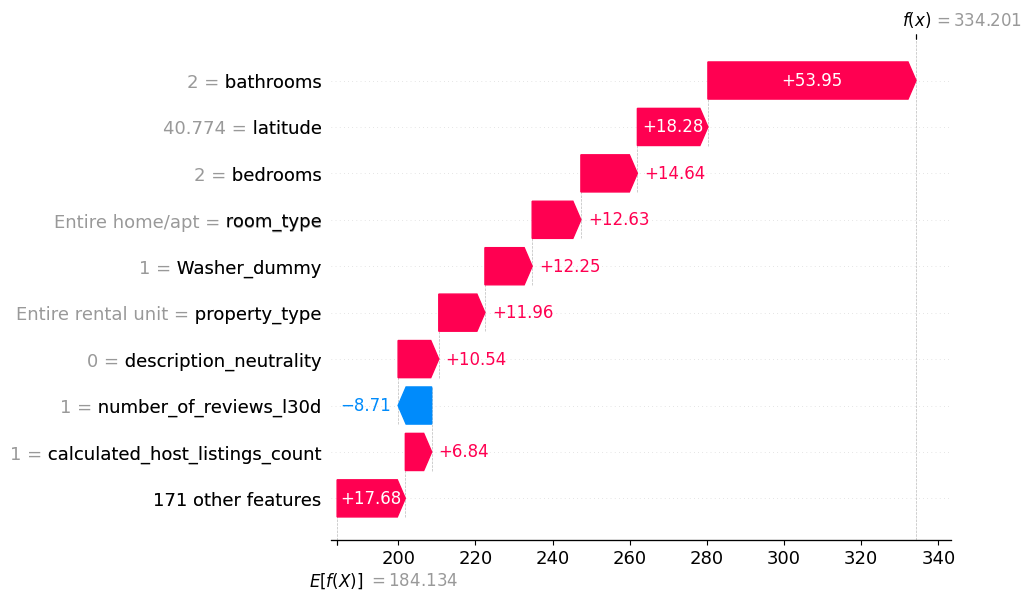

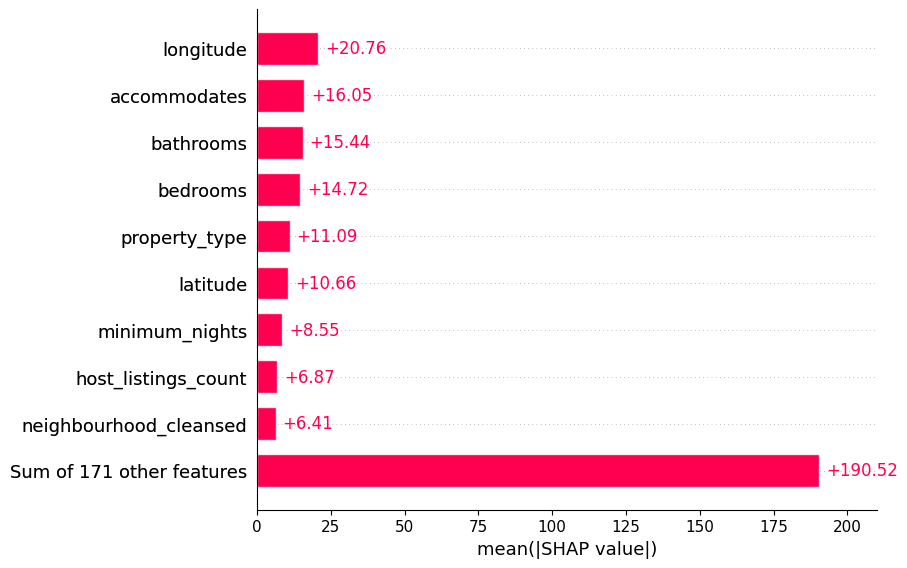

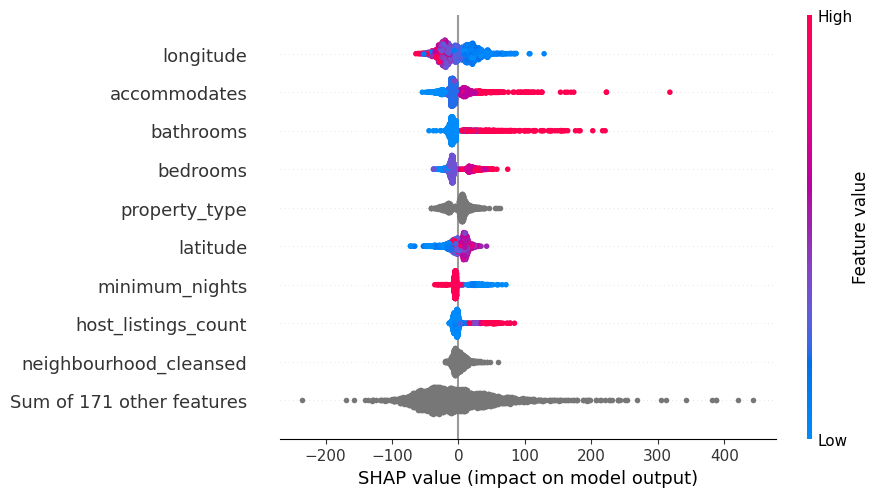

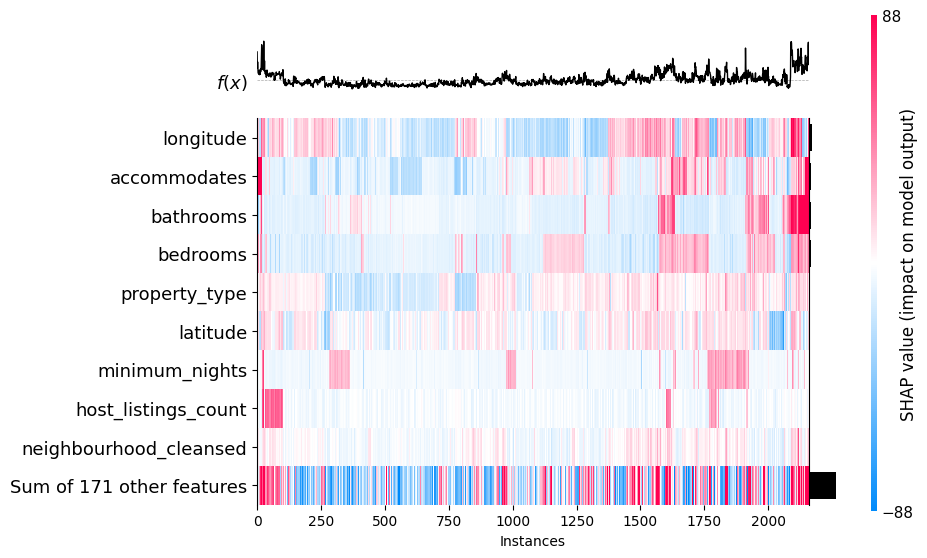

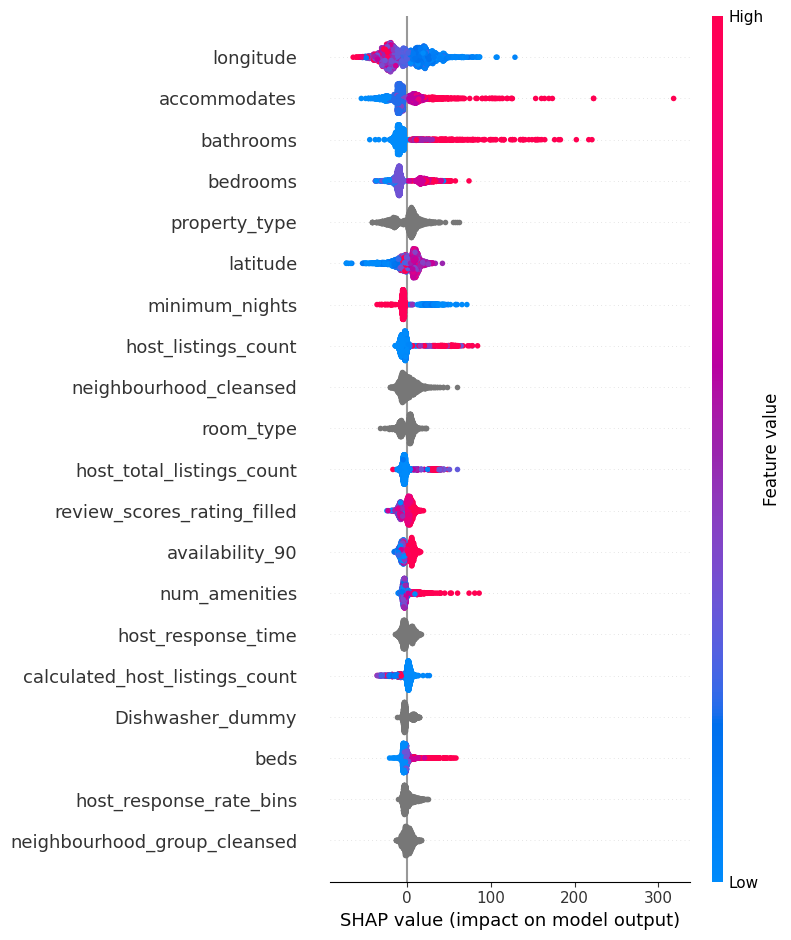

In [11]:
import shap

# Initialize the explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Plot the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)
shap.plots.heatmap(shap_values)

# Plot the summary of SHAP values for all features
shap.summary_plot(shap_values, X_test)

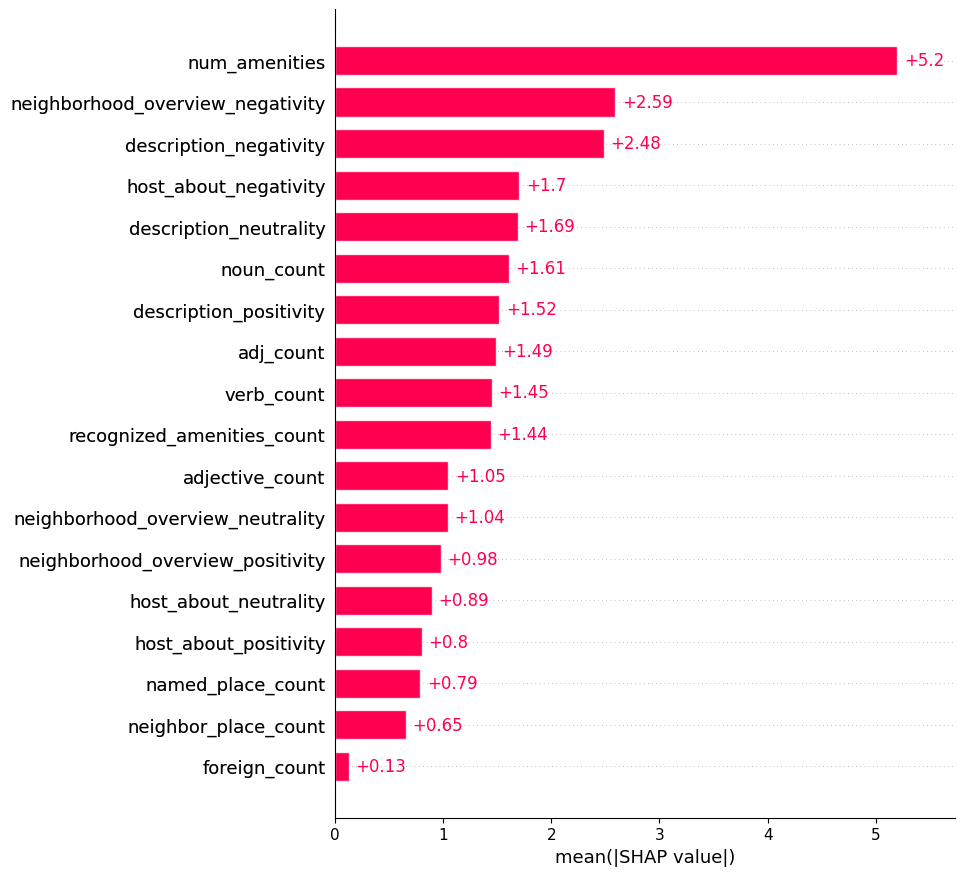

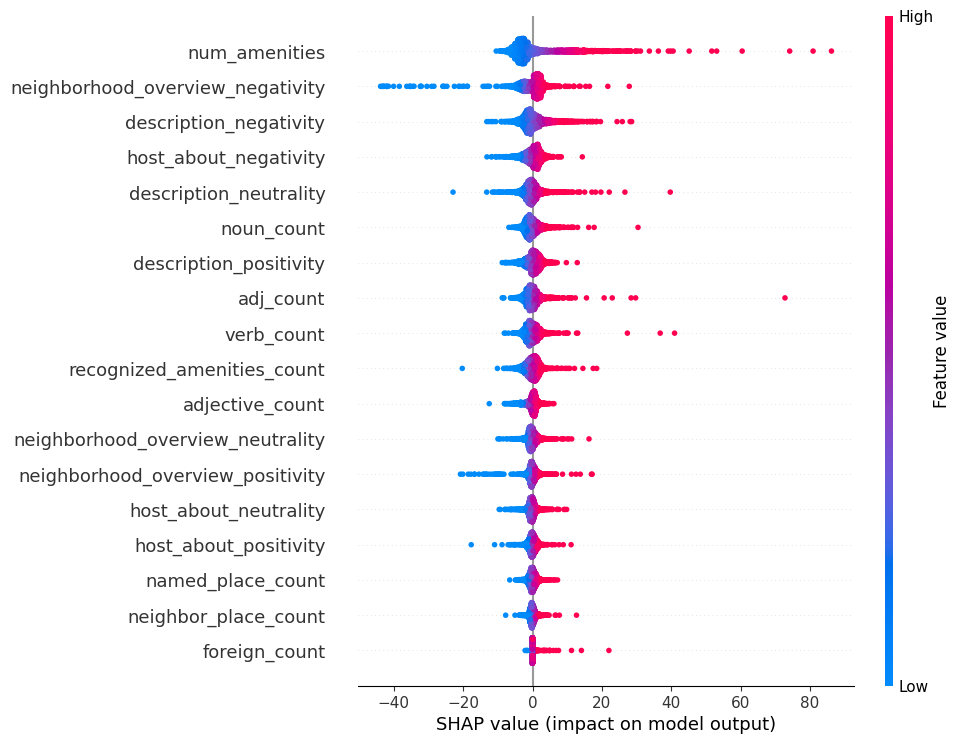

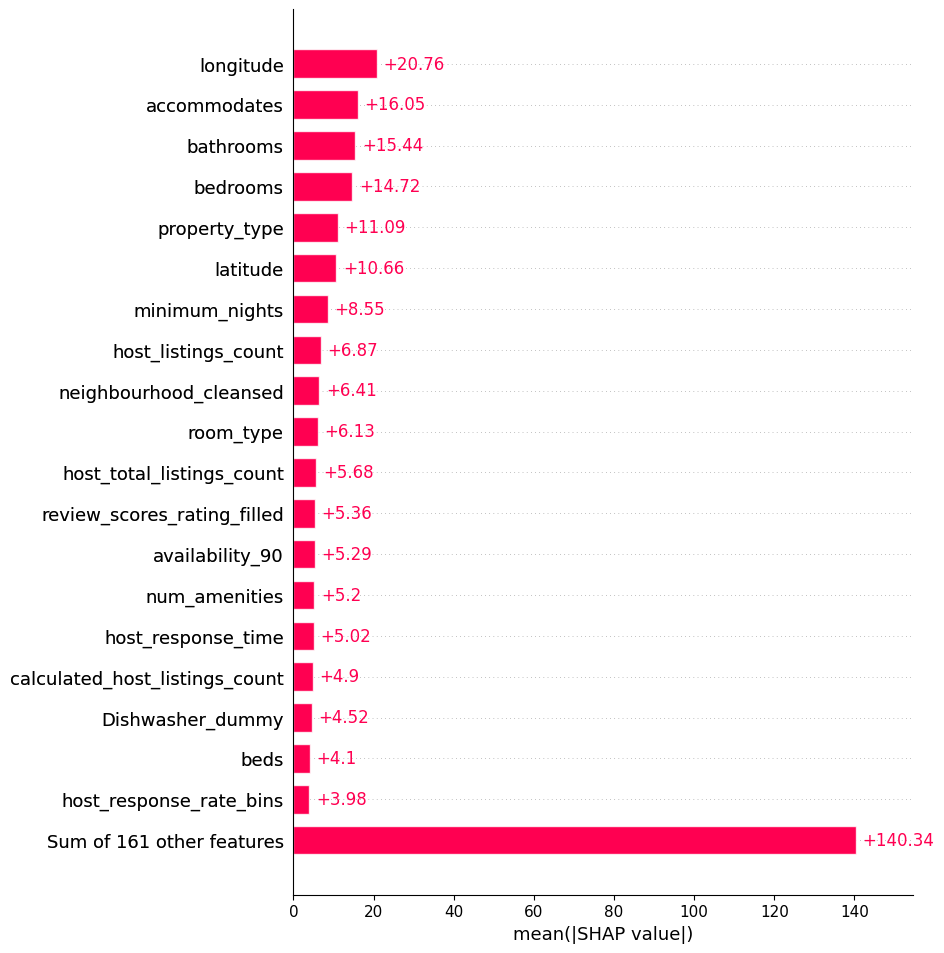

In [22]:
# List of attributes to keep
attributes = [
    "recognized_amenities_count",
    "num_amenities",
    "noun_count",
    "adj_count",
    "verb_count",
    "foreign_count",
    "named_place_count",
    "adjective_count",
    "neighbor_place_count",
    "description_negativity",
    "description_neutrality",
    "description_positivity",
    "host_about_negativity",
    "host_about_neutrality",
    "host_about_positivity",
    "neighborhood_overview_negativity",
    "neighborhood_overview_neutrality",
    "neighborhood_overview_positivity"
]
# Assuming `shap_values` is your calculated SHAP values
# Convert the SHAP values to a DataFrame for easier manipulation
shap_df = pd.DataFrame(shap_values.values, columns=shap_values.feature_names)

# Filter the DataFrame to include only the features in your list
filtered_shap_df = shap_df[attributes]

# Convert the filtered DataFrame back to SHAP values
filtered_shap_values = shap.Explanation(values=filtered_shap_df.values, 
                                        base_values=shap_values.base_values, 
                                        data=filtered_shap_df, 
                                        feature_names=filtered_shap_df.columns.tolist())

shap.plots.bar(filtered_shap_values, max_display=20)
shap.plots.beeswarm(filtered_shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)

2. LassoCV

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model
model = LassoCV(random_state=42, n_jobs=-1)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define hyperparameters to tune
param_grid = {'model__cv': [5, 10], 'model__eps': [0.001, 0.01]}

# Define GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit model
grid_search.fit(X_train[independent_vars], y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Get the best estimator
best_model = grid_search.best_estimator_

# Get predictions on validation set
y_val_pred = best_model.predict(X_val[independent_vars])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = best_model.predict(X_test[independent_vars])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Using Best Params

In [77]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model with best parameters
model = LassoCV(cv=5, eps=0.001, random_state=42, n_jobs=-1)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit model
pipeline.fit(X_train[independent_vars], y_train)

# Get predictions on validation set
y_val_pred = pipeline.predict(X_val[independent_vars])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = pipeline.predict(X_test[independent_vars])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Validation Root Mean Squared Error: 121.09162675826457
Validation R-squared: 0.23240606864795554
Validation Adjusted R-squared: 0.16248354453693936
Test Root Mean Squared Error: 123.30590948787304
Test R-squared: 0.2321142199581604
Test Adjusted R-squared: 0.16223583754788184


3. SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model
model = SVR()

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define hyperparameters to tune
param_grid = {'model__C': [0.1, 1, 10], 
              'model__epsilon': [0.1, 0.2, 0.3],
              'model__kernel': ['poly', 'rbf']}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=3, n_jobs=-1, random_state=42)

# Fit model
random_search.fit(X_train[independent_vars], y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f'Best parameters: {best_params}')

# Get the best estimator
best_model = random_search.best_estimator_

# Get predictions on validation set
y_val_pred = best_model.predict(X_val[independent_vars])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = best_model.predict(X_test[independent_vars])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Using Best Params

In [78]:
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), [i for i in cat_features if 'dumm' not in i])],
    remainder='passthrough')

# Define model with best parameters
model = SVR(kernel='rbf', epsilon=0.1, C=10)

# Create pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit model
pipeline.fit(X_train[independent_vars], y_train)

# Get predictions on validation set
y_val_pred = pipeline.predict(X_val[independent_vars])

# Evaluate the model on validation set
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f'Validation Root Mean Squared Error: {rmse_val}')

# Calculate R-squared on validation set
r2_val = r2_score(y_val, y_val_pred)
print(f'Validation R-squared: {r2_val}')

# Calculate Adjusted R-squared on validation set
n_val = len(y_val)  # number of samples in validation set
p = len(independent_vars)  # number of predictors
adjusted_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p - 1)
print(f'Validation Adjusted R-squared: {adjusted_r2_val}')

# Get predictions on test set
y_pred = pipeline.predict(X_test[independent_vars])

# Evaluate the model on test set
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test Root Mean Squared Error: {rmse}')

# Calculate R-squared on test set
r2 = r2_score(y_test, y_pred)
print(f'Test R-squared: {r2}')

# Calculate Adjusted R-squared on test set
n = len(y_test)  # number of samples in test set
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Test Adjusted R-squared: {adjusted_r2}')

Validation Root Mean Squared Error: 142.39303524299004
Validation R-squared: -0.061404196480837836
Validation Adjusted R-squared: -0.1580908135691732
Test Root Mean Squared Error: 145.16313950368445
Test R-squared: -0.06424482773849327
Test Adjusted R-squared: -0.16109218314442297
